# 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÌïòÍ∏∞
+ ÏöîÍ∏∞ÏöîÏôÄ Íµ¨Í∏ÄÎßµÏóê Ï°¥Ïû¨ÌïòÎäî 'ÏÑ±Í∑†Í¥ÄÎåÄ(ÏÑúÏö∏)' Í∑ºÏ≤òÏùò ÏπòÌÇ®Ïßë 20Í∞úÏùò Î¶¨Î∑∞Îì§ÏùÑ ÏàòÏßëÌïúÎã§.

## 1-1. ÏöîÍ∏∞Ïöî Î¶¨Î∑∞ ÏàòÏßëÌïòÍ∏∞


### 1) Í∞ÄÍ≤åÎ≥Ñ Í≥†Ïú† Î≤àÌò∏ ÏàòÏßë

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-brower/chromedriver/usr/bin

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.7/9.7 MB 45.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 481.7/481.7 kB 24.5 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,619 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRel

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

!pip install selenium
!pip install webdriver_manager

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import Select
import requests
from urllib.parse import quote
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

In [ ]:
store_info = pd.DataFrame()

In [ ]:
#urlÎ°ú Ïù¥ÎèôÌïú ÌõÑ Í∞ÄÍ≤åÎì§Ïùò Í≥†Ïú† Î≤àÌò∏ Ï∞æÍ∏∞
def store_id(driver):
  global store_info

  #ÏπòÌÇ® Ïπ¥ÌÖåÍ≥†Î¶¨ ÌÅ¥Î¶≠
  XPATH = '//*[@id="category"]/ul/li[5]/span'
  category_element = WebDriverWait(driver, 10).until(
              EC.presence_of_element_located((By.XPATH, XPATH))
          )
  driver.execute_script("arguments[0].click();", category_element)

  #Î¶¨Î∑∞ ÎßéÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
  dropdown = driver.find_element(By.XPATH, '//*[@id="content"]/div/div[1]/div[2]/div/select')
  select = Select(dropdown)
  time.sleep(1)
  select.select_by_value("review_count")

  #ÏπòÌÇ® Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏÜçÌïú Í∞ÄÍ≤å 20Í∞úÏùò Í≥†Ïú† Î≤àÌò∏ Ï∞æÍ∏∞
  for i in range(20):
    stores = WebDriverWait(driver, 10).until(
              EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".restaurant-name.ng-binding")))[:20]
    stores[i].click()
    time.sleep(2)

    store_url = driver.current_url.rstrip('/').split('/')[-1] #Í∞ÄÍ≤å Í≥†Ïú† Î≤àÌò∏
    store_name = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".restaurant-name.ng-binding"))).text
    review_count = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'li[ng-class*="review"] .ng-binding'))).text

    data = pd.DataFrame({
                  'id': [store_url], # Í∞ÄÍ≤å ID
                  'name' : [store_name],
                  'review_count' : [review_count] #Î¶¨Î∑∞ Ïàò
              })
    store_info = pd.concat([store_info, data])
    driver.back()
    time.sleep(2)

In [ ]:
def move_to_url(driver, search_key):
  url = "https://www.yogiyo.co.kr/mobile/#/"
  driver.get(url)
  time.sleep(2)

  search_box = driver.find_element(By.XPATH, '//*[@id="search"]/div/form/input')
  search_button = driver.find_element(By.XPATH, '//*[@id="button_search_address"]/button[2]')

  # Í≤ÄÏÉâÏñ¥ ÏûÖÎ†• Î∞è Î≤ÑÌäº ÌÅ¥Î¶≠
  search_box.send_keys(search_key)
  time.sleep(1)
  search_button.click()
  time.sleep(2)
  try:
    elements = WebDriverWait(driver, 10).until(
        EC.visibility_of_all_elements_located((By.CSS_SELECTOR, ".ng-binding.ng-scope"))
    )
  except:
    elements = None
  if elements:
    elements[1].click()
  return driver

In [ ]:
search_keys = ['ÏÑúÏö∏ ÏÜ°ÌååÍµ¨ Ïã†Ï≤úÎèô 29-5 ÏÜ°ÌååÍµ¨Ï≤≠','ÎßàÌè¨Íµ¨Ï≤≠','Í∞ïÎÇ®Íµ¨Ï≤≠','Í¥ÄÏïÖÍµ¨Ï≤≠','Í∞ïÏÑúÍµ¨Ï≤≠','ÏÑ±Î∂ÅÍµ¨Ï≤≠',
               'ÏòÅÎì±Ìè¨Íµ¨Ï≤≠','ÏùÄÌèâÍµ¨Ï≤≠','ÏñëÏ≤úÍµ¨Ï≤≠','Íµ¨Î°úÍµ¨Ï≤≠','ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏòàÏßÄÎèô 293-1 Ï¢ÖÎ°úÍ¥ëÏû•ÏãúÏû•','ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ ÎÇ®Ï∞ΩÎèô 4-2 ÎÇ®ÎåÄÎ¨∏ÏãúÏû•','Î™ÖÎèô','ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ïó∞Í±¥Îèô 128-8 ÌôçÏùµÎåÄÌïôÍµêÎåÄÌïôÎ°úÏ∫†ÌçºÏä§',
               'ÌòúÌôîÎèôÎ°úÌÑ∞Î¶¨','Ï∂©Î¨¥ÏïÑÌä∏ÏÑºÌÑ∞']

for key in search_keys:
  tell_driver = move_to_url(driver, key)
  store_id(driver)
base_url = "https://www.yogiyo.co.kr/api/v1/reviews/"
store_info['review_url'] = [f"{base_url}{store_id}/" for store_id in store_info['id']]

In [ ]:
store_info.drop_duplicates(inplace=True)
store_info.to_csv("/content/drive/MyDrive/yogigyo_store_id_data.csv", index=False, encoding="utf-8")

### 2)ÏùåÏãùÏ†ê Î¶¨Î∑∞ ÏàòÏßë


In [ ]:
import math
yogiyo_review = pd.DataFrame()
store_info =pd.read_csv("/content/drive/MyDrive/yogigyo_store_id_data.csv")

for i in range(len(store_info)): #Í∞ÄÍ≤å ÌïòÎÇòÏî© Î¶¨Î∑∞ ÏàòÏßëÌïòÍ∏∞
  url = store_info['review_url'].iloc[i].strip() + '?count=10&only_photo_review=false&sort=time&'
  store_id = store_info['id'].iloc[i]
  store_name =store_info['name'].iloc[i]
  num = int(store_info['review_count'].iloc[i])
  max_review_page  = math.ceil(num / 10)

  for j in range(1, max_review_page + 1):
        set_url = url + f'page={j}'
        response = requests.get(set_url)
        temp_reviews = response.json()

        for x in range(min(10, len(temp_reviews))):
          menu = temp_reviews[x].get('menu_items', [])
          menu_name = menu[0]['name'] if menu and 'name' in menu[0] else ''
          reviews = pd.DataFrame({
              'store_id': [store_id],  # Í∞ÄÍ≤å ID
              'store_name': [store_name],                     # Í∞ÄÍ≤å Ïù¥Î¶Ñ
              'comment': temp_reviews[x].get('comment', ''),  # Î¶¨Î∑∞ ÎÇ¥Ïö©
              'rating': temp_reviews[x].get('rating', ''),    # ÌèâÏ†ê
              'menu': [menu_name] # Î©îÎâ¥
          })
          yogiyo_review = pd.concat([yogiyo_review, reviews], ignore_index=True)

In [ ]:
yogiyo_review.to_csv("/content/drive/MyDrive/yogigyo_Review_data.csv", index=False, encoding="utf-8")

## 1-2. Íµ¨Í∏ÄÎßµ Î¶¨Î∑∞ ÏàòÏßëÌïòÍ∏∞ <ÏÑúÏö∏>

### 1) Íµ¨Í∏ÄÎßµ ÏπòÌÇ®ÏßëÎì§Ïùò Í∞úÎ≥Ñ urlÍ≥º Í∞ÄÍ≤å Ïù¥Î¶Ñ ÏàòÏßëÌïòÍ∏∞

: Í∞ÄÍ≤åÏùò Ïù¥Î¶ÑÏùÄ Í∞ôÏúºÎÇò, Ïû•ÏÜåÍ∞Ä Îã¨Îùº urlÏù¥ Îã§Î•∏ rowÎì§ Ï°¥Ïû¨.

In [ ]:
import urllib.parse

In [ ]:
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

In [ ]:
search_term =  urllib.parse.quote('ÏπòÌÇ®')
url_list = [
            f'https://www.google.com/maps/search/{search_term}/@37.5144533,127.1059047,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D', #ÏÜ°ÌååÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.566242,126.9019425,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D', #ÎßàÌè¨Íµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5175066,127.0473753,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D',   #Í∞ïÎÇ®Íµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.4782605,126.9515208,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D',  #Í¥ÄÏïÖÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5509103,126.8495742,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D',   #Í∞ïÏÑúÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.589366,127.016743,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTEwNi4wIKXMDSoASAFQAw%3D%3D', #ÏÑ±Î∂ÅÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5262625,126.8959528,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #ÏòÅÎì±Ìè¨Íµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.602749,126.929256,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D',#ÏùÄÌèâÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5169508,126.8665644,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #ÏñëÏ≤úÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.4954703,126.8876391,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #Íµ¨Î°úÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5700398,126.9996036,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #Ï¢ÖÎ°úÍ¥ëÏû•ÏãúÏû•
            f'https://www.google.com/maps/search/{search_term}/@37.5591786,126.9776692,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #ÎÇ®ÎåÄÎ¨∏ÏãúÏû•
            f'https://www.google.com/maps/search/{search_term}/@37.55998,126.9858296,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #Î™ÖÎèô
            f'https://www.google.com/maps/search/{search_term}/@37.5507563,126.9254901,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D',#ÌôçÏùµÎåÄ
            f'https://www.google.com/maps/search/{search_term}/@37.5855329,127.0012167,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #ÌòúÌôîÎèôÎ°úÌÑ∞Î¶¨
            f'https://www.google.com/maps/search/{search_term}/@37.5659291,127.0148592,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMC4wIKXMDSoASAFQAw%3D%3D', #Ï∂©Î¨¥ÏïÑÌä∏ÏÑºÌÑ∞
            f'https://www.google.com/maps/search/{search_term}/@37.4835872,127.0326987,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D', #ÏÑúÏ¥àÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5742015,127.0398327,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D', #ÎèôÎåÄÎ¨∏Íµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.5124298,126.9397997,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D', #ÎèôÏûëÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.6063046,127.0931523,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D', #Ï§ëÎûëÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.6540782,127.0566045,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D', #ÎÖ∏ÏõêÍµ¨Ï≤≠
            f'https://www.google.com/maps/search/{search_term}/@37.6397767,127.0255184,15z/data=!3m1!4b1?hl=ko&entry=ttu&g_ep=EgoyMDI0MTExMS4wIKXMDSoASAFQAw%3D%3D' #Í∞ïÎ∂ÅÍµ¨Ï≤≠
]

In [ ]:
google_map_store_info = pd.DataFrame()

for url in url_list:
    driver.delete_all_cookies()
    driver.get(url)
    time.sleep(2)
    scroll_div = WebDriverWait(driver, 20).until(
        EC.visibility_of_element_located((By.XPATH, '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]'))
    )

    # ÌéòÏù¥ÏßÄ ÎÅùÍπåÏßÄ Ïä§ÌÅ¨Î°§
    last_height = driver.execute_script("return arguments[0].scrollHeight", scroll_div)
    while True:
        driver.execute_script("arguments[0].scrollBy(0, 3000);", scroll_div)
        time.sleep(2)
        new_height = driver.execute_script("return arguments[0].scrollHeight", scroll_div)
        if new_height == last_height:
            break
        last_height = new_height

    for i in range(3,42,2): #20Í∞úÏùò Í∞ÄÍ≤å Ï†ïÎ≥¥ ÏàòÏßë
      xpath = f'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]/div[{i}]/div'
      store = driver.find_element(By.XPATH,xpath)
      store_html = store.get_attribute('outerHTML')
      soup = BeautifulSoup(store_html, 'html.parser')
      tag = soup.find('a', class_="hfpxzc")
      store_name = tag.get("aria-label")
      store_url = tag.get("href")
      data = pd.DataFrame({
          'Í∞ÄÍ≤å Ïù¥Î¶Ñ': [store_name],
          'url': [store_url]
      })

      google_map_store_info = pd.concat([google_map_store_info, data], ignore_index=True)

In [ ]:
google_map_store_info.drop_duplicates(inplace=True)

In [ ]:
google_map_store_info.to_csv("/content/drive/MyDrive/google_map_store.csv", index=False, encoding="utf-8")

### 2) Íµ¨Í∏ÄÎßµ Í∞ÄÍ≤åÎì§Ïùò Î¶¨Î∑∞ÏôÄ Î≥ÑÏ†ê ÏàòÏßëÌïòÍ∏∞

In [ ]:
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

In [ ]:
def scroll_to_end(driver):
  scroll_div = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, ".m6QErb.DxyBCb.kA9KIf.dS8AEf.XiKgde"))
    )
  last_height = driver.execute_script("return arguments[0].scrollHeight", scroll_div)
  print(f'first_height:{last_height}')
  while True:
    #15000
    driver.execute_script("arguments[0].scrollBy(0, 100000);", scroll_div)
    time.sleep(2)
    new_height = driver.execute_script("return arguments[0].scrollHeight", scroll_div)

    if new_height == last_height:
      break
    last_height = new_height
  print("ÌéòÏù¥ÏßÄ ÎÅùÍπåÏßÄ Ïä§ÌÅ¨Î°§ ÏôÑÎ£å")
  print(f'end_height:{new_height}')

In [ ]:
store_info =pd.read_csv("/content/drive/MyDrive/google_map_store.csv")
google_map_review = pd.DataFrame()

for idx,row in store_info.iterrows():
  url = row['url']
  driver.get(url)

  store_name =row['Í∞ÄÍ≤å Ïù¥Î¶Ñ']
  review_button = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[3]/div/div/button[2]/div[2]/div[2]')
  review_button.click()
  scroll_to_end(driver)

  information =driver.find_elements(By.CSS_SELECTOR, ".GHT2ce:not([class*=' '])")

  for info in information:
    info = info.get_attribute('outerHTML')
    soup = BeautifulSoup(info, 'html.parser')
    rating_tag = soup.find('span', {'aria-label': lambda x: x and 'Î≥ÑÌëú' in x})
    rating = rating_tag['aria-label'] if rating_tag else ""

    try:
          more_button = driver.find_element(By.CSS_SELECTOR, 'button.w8nwRe.kyuRq[aria-label="ÎçîÎ≥¥Í∏∞"]')
          more_button.click()
          time.sleep(1)
    except:
          pass
    comment_tag = soup.find('span', class_="wiI7pd")
    comment = comment_tag.text.strip() if comment_tag else ""
    df = pd.DataFrame({
        'Í∞ÄÍ≤å Ïù¥Î¶Ñ': [store_name],
        'ÏΩîÎ©òÌä∏': [comment],
        'Î≥ÑÏ†ê': [rating]
    })
    google_map_review = pd.concat([google_map_review,df])

In [ ]:
google_map_review.to_csv("/content/drive/MyDrive/google_map_review.csv", index=False, encoding="utf-8")

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## 2-1) Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import ast
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-9yqqdjlg
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-9yqqdjlg
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2286921 sha256=d78af2399a642fc8846150f2331df331d03ea831af534f6f9034700ed703e146
  Stored in directory: /tmp/pip-ephem-wheel-cache-1r8mm2a6/wheels/76/b3/33/dda14886ee76b8e53eb05580a14dfcf9145e9eb9d282c53f28
Successfully built pykospacing


In [ ]:
df_seoul = pd.read_csv("/content/drive/MyDrive/google_map_review.csv")
df_gwangju = pd.read_csv("/content/drive/MyDrive/google_map_review_Í¥ëÏ£º_Ï†ÑÎÇ®.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/google_map_review_ÎåÄÍµ¨.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/google_map_review_Ïö∏ÏÇ∞.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/google_map_review_Í≤ΩÍ∏∞ÎèÑ.csv")
df_6 = pd.read_csv("/content/drive/MyDrive/google_map_review_ÎåÄÏ†Ñ.csv")
df_7 = pd.read_csv("/content/drive/MyDrive/google_map_review_Î∂ÄÏÇ∞.csv")
df_8 = pd.read_csv("/content/drive/MyDrive/google_map_review_Ïù∏Ï≤ú.csv")
df_9 = pd.read_csv("/content/drive/MyDrive/google_map_review_Ï†úÏ£º.csv")
df_combined = pd.concat([df_seoul, df_gwangju, df_3, df_4,df_5,df_6,df_7,df_8,df_9], ignore_index=True)

In [ ]:
google_map_data = df_combined

In [ ]:
yogiyo_data = pd.read_csv("/content/drive/MyDrive/yogigyo_Review_data.csv")

In [ ]:
# Î≥ÑÏ†ê Ïà´ÏûêÎ°ú Î≥ÄÍ≤Ω
google_map_data['Î≥ÑÏ†ê'] = google_map_data['Î≥ÑÏ†ê'].str.extract('(\d+)').astype(int)
# nan Í∞í Ï†úÍ±∞
google_map_data = google_map_data.dropna()
# Ï§ëÎ≥µ Ï†úÍ±∞
google_map_data = google_map_data.drop_duplicates(subset=['Í∞ÄÍ≤å Ïù¥Î¶Ñ', 'ÏΩîÎ©òÌä∏', 'Î≥ÑÏ†ê'])
# Ïó¥ Ïù¥Î¶Ñ ÎßûÏ∂§
google_map_data.columns = ['store_name', 'comment', 'rating']
# Ïù∏Îç±Ïä§ Î¶¨ÏÖã
google_map_data.reset_index(drop=True, inplace=True)
google_map_data.to_csv("/content/drive/MyDrive/google_map_review_final.csv")

In [ ]:
# 'store_name', 'menu' Ïó¥ ÏÇ≠Ï†ú
yogiyo_data = yogiyo_data.drop(['store_name', 'menu'], axis=1)
# nan Í∞í Ï†úÍ±∞
yogiyo_data = yogiyo_data.dropna()
# Ï§ëÎ≥µ Ï†úÍ±∞
yogiyo_data = yogiyo_data.drop_duplicates(subset=['store_id', 'comment', 'rating'])
# Ïù∏Îç±Ïä§ Î¶¨ÏÖã
yogiyo_data.reset_index(drop=True, inplace=True)
yogiyo_data.to_csv("/content/drive/MyDrive/yogigyo_Review_data.csv")

In [ ]:
yogiyo_data.head()

Unnamed: 0  store_id                                  comment  rating
0           0     82027  ÎøåÎßÅÌÅ¥ÏùÄ Ïñ∏Ï†úÎÇò ÎßõÏûàÍ∏¥ Ìï¥Ïöî ÏÜåÏä§Í∞Ä Ïò§ÎûòÎêúÍ±¥ÏßÄ Ï†§Î¶¨Ï≤òÎüº Íµ≥Ïñ¥ÏÑú ÏôîÏñ¥Ïöî.       5
1           1     82027           Ïò§ÎäòÏùÄ ÏñëÎÖêÏùÑ Îçî ÎÑâÎÑâÌûà ÏûÖÌòÄÏ£ºÏÖîÏÑú ÎßõÏûàÍ≤å Î®πÏóàÏñ¥Ïöî ~       5
2           2     82027                      ÎÑò ÎπÑÏÇ≠ÎπÑÏÇ≠ÌïòÍ≤å ÎßõÎÇòÍ≤å ÏûòÎ®πÏóàÏñ¥Ïöî~       5
3           3     82027                            ÏûòÎ∞õÏïòÍ≥† Ïû¨Íµ¨Îß§ÏòàÏ†ïÏûÖÎãàÎã§       5
4           4     82027    Îã≠Ïù¥ ÎºàÎßå ÏûàÎÑ§Ïöî. bhc Ïò§Îû´ÎèôÏïà Î®πÏóàÎäîÎç∞ Ïù¥Îü∞ Îã≠ÏùÄ Ï≤òÏùåÏù¥ÏòàÏöî.       1

In [ ]:
yogiyo_data.shape

(37840, 4)

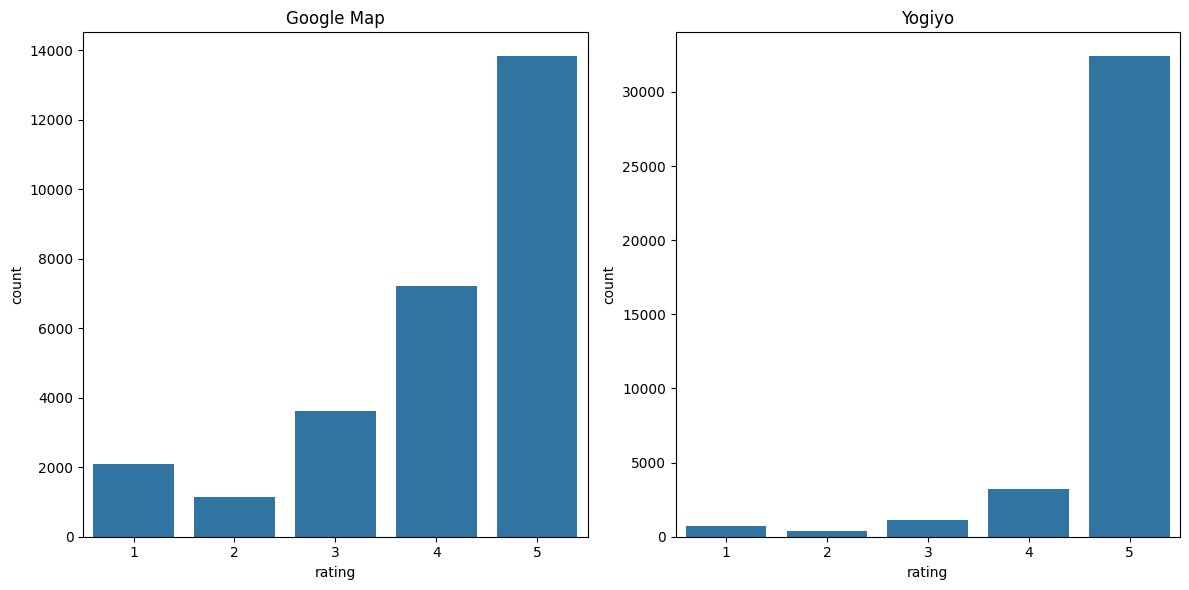

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='rating', data=google_map_data, ax=axes[0])
sns.countplot(x='rating', data=yogiyo_data, ax=axes[1])
axes[0].set_title('Google Map')
axes[1].set_title('Yogiyo')

plt.tight_layout()
plt.show()

In [ ]:
google_store_count = google_map_data['store_name'].nunique()
google_review_count = len(google_map_data)

yogiyo_store_count = yogiyo_data['store_id'].nunique()
yogiyo_review_count = len(yogiyo_data)

# Íµ¨Í∏Ä Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
google_mean = google_map_data['rating'].mean()
google_std = google_map_data['rating'].std()

# ÏöîÍ∏∞Ïöî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®
yogiyo_mean = yogiyo_data['rating'].mean()
yogiyo_std = yogiyo_data['rating'].std()

summary_data = {
    "ÌîåÎû´Ìèº": ["ÏöîÍ∏∞Ïöî", "Íµ¨Í∏Ä"],
    "Í∞ÄÍ≤å Ïàò": [yogiyo_store_count, google_store_count],
    "Î¶¨Î∑∞ Ïàò": [yogiyo_review_count, google_review_count],
    "ÌèâÏ†ê ÌèâÍ∑†": [yogiyo_mean, google_mean],
    "ÌèâÏ†ê Ìé∏Ï∞®": [yogiyo_std, google_std]
}

summary_df = pd.DataFrame(summary_data)
summary_df

ÌîåÎû´Ìèº  Í∞ÄÍ≤å Ïàò   Î¶¨Î∑∞ Ïàò     ÌèâÏ†ê ÌèâÍ∑†     ÌèâÏ†ê Ìé∏Ï∞®
0  ÏöîÍ∏∞Ïöî    22  37840  4.749683  0.731638
1   Íµ¨Í∏Ä  2055  27893  4.060625  1.206763

In [ ]:
#ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ + ÏûêÏùå, Î™®ÏùåÎßå ÏûàÎäî Í≤É Ï†úÍ±∞ + Í≥µÎ∞± Ïó¨Îü¨ Í∞úÎ•º ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú
#df = pd.read_csv("/content/drive/MyDrive/google_map_review_final.csv")
import re
def clean_text(text):
  # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
  text = re.sub(r'[^\w\s]', '', text)
  # ÏûêÏùå, Î™®ÏùåÎßå ÏûàÎäî Í≤É Ï†úÍ±∞
  text = re.sub(r'\b[„Ñ±-„Öé„Öè-„Ö£]+\b', '', text)
  # Í≥µÎ∞± Ïó¨Îü¨ Í∞úÎ•º ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
  text = re.sub(r'\s+', ' ', text).strip()
  return text
#df['comment'] = df['comment'].apply(lambda x: clean_text(x) if pd.notna(x) else x)
yogiyo_data['comment_'] = yogiyo_data['comment'].apply(lambda x: clean_text(x) if pd.notna(x) else x)

In [ ]:
#ÎùÑÏñ¥Ïì∞Í∏∞ ÍµêÏ†ï-PyKoSpacing
from pykospacing import Spacing
def correct_spacing(text):
  spacing = Spacing()
  corrected_text = spacing(text)
  return corrected_text
#df['comment'] = df['comment'].apply(lambda x: correct_spacing(x) if pd.notna(x) else x)
yogiyo_data['comment_'] = yogiyo_data['comment_'].apply(lambda x: correct_spacing(x) if pd.notna(x) else x)

In [ ]:
#SOYNLPÏùÑ Ïù¥Ïö©Ìïú Î∞òÎ≥µÎêòÎäî Î¨∏Ïûê Ï†úÌïú
!pip install soynlp
from soynlp.normalizer import *

def exception(text):
  text = emoticon_normalize(text, num_repeats = 2)
  return text

#df['comment'] = df['comment'].apply(lambda x: exception(x) if pd.notna(x) else x)
yogiyo_data['comment_'] = yogiyo_data['comment_'].apply(lambda x: exception(x) if pd.notna(x) else x)

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
okt = Okt()
stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà', 'Îêò', 'Ïàò', 'Î≥¥', 'Ï£º', 'Îì±', 'Ìïú', 'Ïóê'])

In [ ]:
def preprocessing(okt, review):
  # ÌïúÍ∏ÄÏù¥ ÏïÑÎãå Îã®Ïñ¥Îäî ÏßÄÏö∞Í≥† " "ÏúºÎ°ú ÎåÄÏ≤¥
  review_text = re.sub("[^Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£]", " ", review)
  # ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÌïòÎ©∞ stemming Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©
  token_li = okt.morphs(review_text, stem=True)
  # Ïù¥Ï†Ñ stop_wordsÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÎäî Îã®Ïñ¥Îßå clean_reviewÏóê Îì§Ïñ¥Í∞à Ïàò ÏûàÍ≤å Ìï®
  clean_review = [token for token in token_li if not token in stop_words]
  clean_review = ' '.join(clean_review)
  return clean_review.strip()

#df['comment'] = df["comment"].apply(lambda x: preprocessing(okt, x))
yogiyo_data['comment_'] = yogiyo_data['comment_'].apply(lambda x: preprocessing(okt, x))

In [ ]:
yogiyo_data

In [ ]:
df.to_csv("/content/drive/MyDrive/preprocessed_google_map_review.csv")

In [ ]:
yogiyo_data.to_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")

## 2-2) Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ìï¥ÏÜå

In [ ]:
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

In [ ]:
# Ïó≠Î≤àÏó≠ÏùÑ ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï
trans_list = []  # Ï§ëÍ∞Ñ Î≤àÏó≠ Ï†ÄÏû•
backtrans_list = []  # ÏµúÏ¢Ö Î≤àÏó≠ Í≤∞Í≥º Ï†ÄÏû•

from tqdm import tqdm

# kor_to_trans Ìï®Ïàò: ÌïúÍµ≠Ïñ¥ -> Ïô∏Íµ≠Ïñ¥
def kor_to_trans(text_data, trans_lang):
    global trans_list
    trans_list = []
    for i in tqdm(range(len(text_data))):
        try:
            driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang+'&st='+text_data[i])
            time.sleep(2.5)
            backtrans = driver.find_element(By.XPATH, '//*[@id="txtTarget"]').text
            trans_list.append(backtrans)
        except Exception as e:
            print(f"Error on index {i}: {e}")

# trans_to_kor Ìï®Ïàò: Ïô∏Íµ≠Ïñ¥ -> ÌïúÍµ≠Ïñ¥
def trans_to_kor(transed_list, transed_lang):
    global backtrans_list
    for i in tqdm(range(len(transed_list))):
        try:
            driver.get('https://papago.naver.com/?sk='+transed_lang+'&tk=ko&st='+transed_list[i])
            time.sleep(2.5)
            backtrans = driver.find_element(By.XPATH, '//*[@id="txtTarget"]').text
            backtrans_list.append(backtrans)
        except Exception as e:
            print(f"Error on index {i}: {e}")
            backtrans_list.append("")

languages = {
    1: ['en', 'ja&hn=0', 'zh-CN', 'fr'],
    2: ['en', 'ja&hn=0', 'zh-CN', 'fr'],
    3: ['en', 'ja&hn=0', 'zh-CN'],
    4: ['en', 'ja&hn=0'],
}

augmented_data = []
count = 0

df = pd.read_csv("/content/drive/MyDrive/preprocessed_google_map_review.csv")

for index, row in df.iterrows():
    rating = row['rating']
    comment = row['comment']
    count += 1
    print(f"#######{count}Î≤à######")
    if rating in languages:
        for lang in languages[rating]:
            # ÌïúÍµ≠Ïñ¥ -> Ïô∏Íµ≠Ïñ¥ Î≤àÏó≠
            kor_to_trans([comment], lang)
            # Ïô∏Íµ≠Ïñ¥ -> ÌïúÍµ≠Ïñ¥ Î≤àÏó≠
            trans_to_kor(trans_list, lang)
            # Í≤∞Í≥º Ï†ÄÏû•
            if backtrans_list:
                augmented_data.append({'rating': rating, 'comment': backtrans_list[-1]})
            else:
                augmented_data.append({'rating': rating, 'comment': comment})

augmented_df = pd.DataFrame(augmented_data)
df_expanded = augmented_df
driver.quit()

In [ ]:
combined_df = df_expanded
combined_df.to_csv("/content/drive/MyDrive/preprocessed_google_map_review+Ïó≠Î≤àÏó≠_Ï†ÑÏ≤¥.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


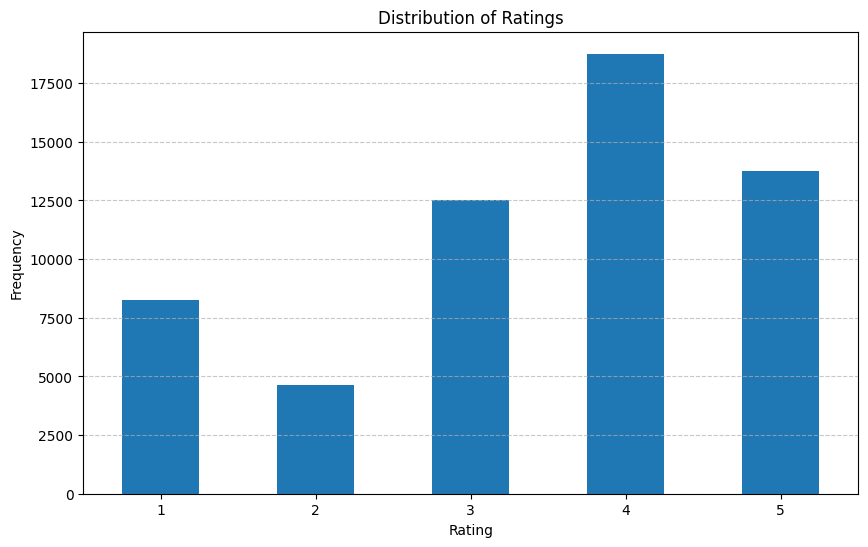

In [ ]:
# Ïó≠Î≤àÏó≠Ïù¥ ÏàòÌñâÎêú Ïù¥ÌõÑ Î∂ÑÌè¨ Î≥ÄÌôî ÌôïÏù∏
plt.figure(figsize=(10, 6))
combined_df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
combined_df = pd.read_csv("/content/drive/MyDrive/preprocessed_google_map_review+Ïó≠Î≤àÏó≠_Ï†ÑÏ≤¥.csv")

In [ ]:
#EDA
import random
import pickle
import pandas as pd
from google.colab import drive

# Google ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
drive.mount('/content/drive')
wordnet_path = '/content/drive/MyDrive/wordnet.pickle'

wordnet = {}

def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return new_words if len(new_words) != 0 else []

def get_synonyms(word):
    synonyms = []
    try:
        for syn in wordnet[word]:
            for s in syn:
                synonyms.append(s)
    except KeyError:
        pass
    return synonyms

def random_deletion(words, p):
    if len(words) == 1:
        return words
    new_words = [word for word in words if random.uniform(0, 1) > p]
    return new_words if len(new_words) != 0 else [random.choice(words)]

def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words):
    if len(new_words) < 2:
        return new_words
    idx1, idx2 = random.sample(range(len(new_words)), 2)
    new_words[idx1], new_words[idx2] = new_words[idx2], new_words[idx1]
    return new_words

def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = random.choice(new_words)
        synonyms = get_synonyms(random_word)
        counter += 1
    if synonyms:
        random_synonym = random.choice(synonyms)
        random_idx = random.randint(0, len(new_words))
        new_words.insert(random_idx, random_synonym)

# EDA Ï†ÅÏö© Ìï®Ïàò
def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
    words = sentence.split(' ')
    words = [word for word in words if word]
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = int(num_aug / 4) + 1

    n_sr = max(1, int(alpha_sr * num_words))
    n_ri = max(1, int(alpha_ri * num_words))
    n_rs = max(1, int(alpha_rs * num_words))

    # Synonym replacement
    for _ in range(num_new_per_technique):
        a_words = synonym_replacement(words, n_sr)
        augmented_sentences.append(' '.join(a_words))

    # Random insertion
    for _ in range(num_new_per_technique):
        a_words = random_insertion(words, n_ri)
        augmented_sentences.append(' '.join(a_words))

    # Random swap
    for _ in range(num_new_per_technique):
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(" ".join(a_words))

    # Random deletion
    for _ in range(num_new_per_technique):
        a_words = random_deletion(words, p_rd)
        augmented_sentences.append(" ".join(a_words))

    random.shuffle(augmented_sentences)

    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    else:
        keep_prob = num_aug / len(augmented_sentences)
        augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

    augmented_sentences.append(sentence)
    return augmented_sentences

# DataFrameÏóê EDA Ï†ÅÏö© Ìï®Ïàò
def apply_eda_to_dataframe_v2(df, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1):
    # ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
    augmented_data = []

    for _, row in df.iterrows():
        comment = row['comment']
        rating = row['rating']

        # Ï¶ùÍ∞ï Î∞∞Ïàò ÏÑ§Ï†ï
        if rating == 1:
            num_aug = 2  # 1Ïù∏ Í≤ΩÏö∞ 2Î∞∞ Ï¶ùÍ∞ï
        elif rating == 2:
            num_aug = 2  # 2Ïù∏ Í≤ΩÏö∞ 2Î∞∞ Ï¶ùÍ∞ï
        else:
            continue  # ÎÇòÎ®∏ÏßÄÎäî Ï¶ùÍ∞ïÌïòÏßÄ ÏïäÏùå

        # EDA Ï†ÅÏö©
        augmented_comments = EDA(comment, alpha_sr, alpha_ri, alpha_rs, p_rd, num_aug)

        for augmented_comment in augmented_comments:
            augmented_data.append({'comment': augmented_comment, 'rating': rating})

    augmented_df = pd.DataFrame(augmented_data)
    return augmented_df

df = combined_df
result_df = apply_eda_to_dataframe_v2(df)
result_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


comment  rating
0        Í±∞Î¶¨Ïùò Ìïú Ïû•ÏÜå       2
1          Í±∞Î¶¨Ïùò Ïû•ÏÜå       2
2        Í±∞Î¶¨Ïùò Ìïú Ïû•ÏÜå       2
3          Í±∞Î¶¨Ïùò ÏúÑÏπò       2
4          Í±∞Î¶¨Ïùò ÏúÑÏπò       2
...           ...     ...
38572  Ï£ºÏ∞®ÎèÑ Ïù∏Ïã¨ Î™ªÌïòÎäî       1
38573  Ï£ºÏ∞®ÎèÑ Î™ªÌïòÎäî Ïù∏Ïã¨       1
38574     Ï£ºÏ∞®ÎèÑ Î™ªÌïòÎã§       1
38575     Î™ªÌïòÎã§ Ï£ºÏ∞®ÎèÑ       1
38576     Ï£ºÏ∞®ÎèÑ Î™ªÌïòÎã§       1

[38577 rows x 2 columns]

In [ ]:
df = pd.concat([result_df, combined_df])

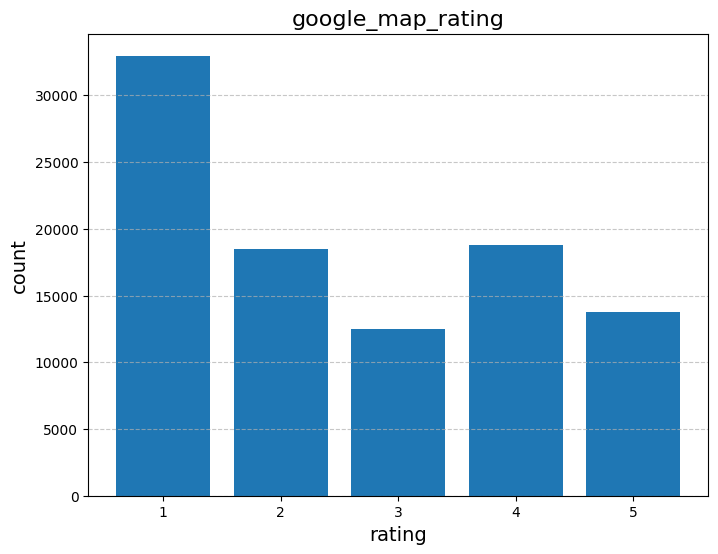

In [ ]:
import matplotlib.pyplot as plt
#EDAÏù¥ÌõÑÏùò Î∂ÑÌè¨ Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞
# Î≥ÑÏ†ê Î∂ÑÌè¨ Í≥ÑÏÇ∞
rating_distribution = df['rating'].value_counts().sort_index()

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 6))
plt.bar(rating_distribution.index, rating_distribution.values)
plt.title('google_map_rating', fontsize=16)
plt.xlabel('rating', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rating_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Î≥ÑÏ†ê ÎπÑÏú® Í≥ÑÏÇ∞
rating_percentage = (df['rating'].value_counts(normalize=True) * 100).sort_index()

# ÎπÑÏú® Ï∂úÎ†•
for rating, percentage in rating_percentage.items():
    print(f"Rating {rating}: {percentage:.2f}%")

Rating 1: 34.18%
Rating 2: 19.15%
Rating 3: 12.98%
Rating 4: 19.45%
Rating 5: 14.25%


In [ ]:
#swap
# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
google_data_cleaned = df
google_data_cleaned = google_data_cleaned.dropna(subset=['comment'])

# Î™®Îì† Í∞íÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
google_data_cleaned['comment'] = google_data_cleaned['comment'].astype(str)

# random_swap Ìï®Ïàò Î∞è Ï¶ùÍ∞ï Ìï®Ïàò Ïú†ÏßÄ
def augment_text_with_swap(text, num_augments=1):
    if not isinstance(text, str):  # Îç∞Ïù¥ÌÑ∞Í∞Ä Î¨∏ÏûêÏó¥Ïù∏ÏßÄ ÌôïÏù∏
        return []
    words = text.split()  # Î¨∏Ïû•ÏùÑ Îã®Ïñ¥ Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨
    augmented_texts = []

    for _ in range(num_augments):
        augmented_text = random_swap(words, n=2)  # 2Î≤à ÍµêÌôò ÏàòÌñâ
        augmented_texts.append(" ".join(augmented_text))  # Ï¶ùÍ∞ïÎêú ÌÖçÏä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò

    return augmented_texts

# Ï§ëÎ≥µÎêú comment Ï†úÍ±∞
unique_google_data = google_data_cleaned.drop_duplicates(subset=['comment'])

# Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
augmented_google_comments = []
augmented_ratings = []
augmented_store_names = []
augmentation_factor = 1

for _, row in unique_google_data.iterrows():
    comment = row['comment']
    rating = row['rating']

    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ìè¨Ìï®
    augmented_google_comments.append(comment)
    augmented_ratings.append(rating)

    # Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
    augmented_comments = augment_text_with_swap(comment, num_augments=augmentation_factor)
    augmented_google_comments.extend(augmented_comments)
    augmented_ratings.extend([rating] * len(augmented_comments))

# ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
augmented_google_data_cleaned = pd.DataFrame({
    'comment': augmented_google_comments,
    'rating': augmented_ratings
})

# Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(f"Original Google Data Shape: {google_data_cleaned.shape}")
print(f"Augmented Data Shape (After Deduplication): {augmented_google_data_cleaned.shape}")
print(augmented_google_data_cleaned.head())


Original Google Data Shape: (96447, 4)
Augmented Data Shape (After Deduplication): (119278, 2)
    comment  rating
0  Í±∞Î¶¨Ïùò Ìïú Ïû•ÏÜå       2
1  Ìïú Ïû•ÏÜå Í±∞Î¶¨Ïùò       2
2    Í±∞Î¶¨Ïùò Ïû•ÏÜå       2
3    Í±∞Î¶¨Ïùò Ïû•ÏÜå       2
4    Í±∞Î¶¨Ïùò ÏúÑÏπò       2


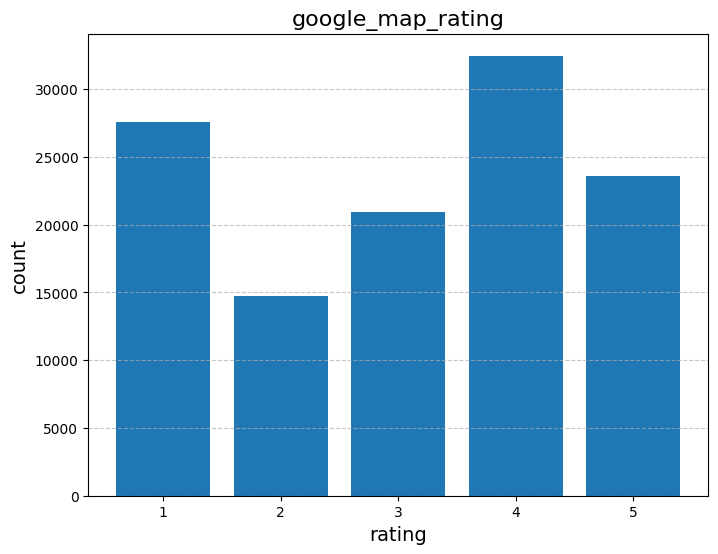

Rating 1: 23.12%
Rating 2: 12.35%
Rating 3: 17.53%
Rating 4: 27.22%
Rating 5: 19.78%


In [ ]:
#swap Ïù¥ÌõÑ Î≥ÄÌôî
import matplotlib.pyplot as plt
df = augmented_google_data_cleaned
# Î≥ÑÏ†ê Î∂ÑÌè¨ Í≥ÑÏÇ∞
rating_distribution = df['rating'].value_counts().sort_index()

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 6))
plt.bar(rating_distribution.index, rating_distribution.values)
plt.title('google_map_rating', fontsize=16)
plt.xlabel('rating', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rating_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Î≥ÑÏ†ê ÎπÑÏú® Í≥ÑÏÇ∞
rating_percentage = (df['rating'].value_counts(normalize=True) * 100).sort_index()

# ÎπÑÏú® Ï∂úÎ†•
for rating, percentage in rating_percentage.items():
    print(f"Rating {rating}: {percentage:.2f}%")

In [ ]:
# ÎπÑÏú®
rating_ratio = [f"{round(percentage):.0f}" for percentage in rating_percentage]

# ÎπÑÏú® Ï∂úÎ†•
print("Rating Ratios: " + ":".join(rating_ratio))

Rating Ratios: 23:12:18:27:20


# Î™®Îç∏ ÌïôÏäµ

##  TF-IDF->Random Forest



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
combined_df = pd.read_csv("/content/drive/MyDrive/preprocess+translate+eda+swap.csv")
x = combined_df['comment']
y = combined_df['rating']

tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)
X_train_resampled, X_test, y_train_resampled,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_resampled,y_train_resampled)
pred = rf.predict(X_test)

# ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
train_pred = rf.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_pred)
print("ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:")
print(f"Train Accuracy (Ï†ïÌôïÎèÑ): {train_accuracy:.4f}")
print("\nTrain Classification Report:")
print(classification_report(y_train_resampled, train_pred))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("\nÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:")
print(f"Test Accuracy (Ï†ïÌôïÎèÑ): {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred))

ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:
Train Accuracy (Ï†ïÌôïÎèÑ): 0.9877

Train Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     21975
           2       0.99      0.98      0.99     11763
           3       0.99      0.98      0.99     16765
           4       0.99      0.99      0.99     26043
           5       0.97      0.99      0.98     18876

    accuracy                           0.99     95422
   macro avg       0.99      0.99      0.99     95422
weighted avg       0.99      0.99      0.99     95422


ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:
Test Accuracy (Ï†ïÌôïÎèÑ): 0.9231

Test Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      5601
           2       0.96      0.94      0.95      2963
           3       0.94      0.84      0.89      4149
           4       0.91      0.90      0.91      6423
           5       0.86      0.95   

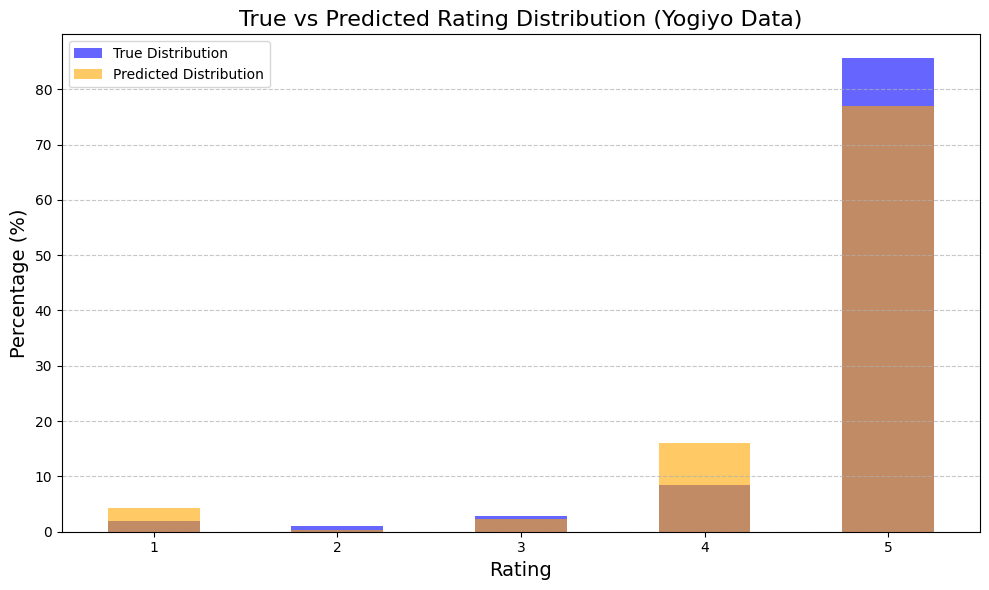

True Distribution (%):
rating
1     1.896932
2     1.048235
3     2.894618
4     8.516242
5    85.643973
Name: proportion, dtype: float64

Predicted Distribution (%):
1     4.280735
2     0.396414
3     2.303988
4    16.109293
5    76.909570
Name: proportion, dtype: float64


In [ ]:
yogiyo_data = pd.read_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")
yogiyo_data.dropna(inplace = True)
yogiyo_data.to_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")
x = yogiyo_data['comment']
y = yogiyo_data['rating']

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

x = tfidf_vectorizer.transform(x)
y_yogiyo_pred = rf.predict(x)

# Ï†ïÎãµÍ∞í Î∂ÑÌè¨ Í≥ÑÏÇ∞
true_distribution_yogiyo = y.value_counts(normalize=True) * 100

# ÏòàÏ∏°Í∞í Î∂ÑÌè¨ Í≥ÑÏÇ∞
pred_distribution_yogiyo = pd.Series(y_yogiyo_pred).value_counts(normalize=True) * 100

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(figsize=(10, 6))

# Ïã§Ï†ú Í∞í Î∂ÑÌè¨
true_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='blue', label='True Distribution', ax=ax)

# ÏòàÏ∏° Í∞í Î∂ÑÌè¨
pred_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='orange', label='Predicted Distribution', ax=ax)

plt.title("True vs Predicted Rating Distribution (Yogiyo Data)", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Î∂ÑÌè¨ Ï∂úÎ†•
print("True Distribution (%):")
print(true_distribution_yogiyo.sort_index())

print("\nPredicted Distribution (%):")
print(pred_distribution_yogiyo.sort_index())


In [ ]:
# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y, y_yogiyo_pred)

# Ï†ïÌôïÎèÑ Ï∂úÎ†•
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7283


In [ ]:
yogiyo = pd.read_csv("/content/drive/MyDrive/yogigyo_Review_data.csv")

In [ ]:
incorrect_indices = np.where(y_yogiyo_pred != y)[0]
correct_indices = np.where(y_yogiyo_pred == y)[0]

index_incorrect = [yogiyo_data['Unnamed: 0'][i] for i in incorrect_indices]
index_correct = [yogiyo_data['Unnamed: 0'][i] for i in correct_indices]

In [ ]:
incorrect_results = pd.DataFrame({
    'Index': incorrect_indices,
    'Actual': y.iloc[incorrect_indices].values,
    'Predicted': y_yogiyo_pred[incorrect_indices],
    'Comment_preprocessing': [list(yogiyo_data['comment'][i]) for i in incorrect_indices],
    'Comment': [list(yogiyo['comment'][i]) for i in index_incorrect]
})

correct_results = pd.DataFrame({
    'Index': correct_indices,
    'Actual': y.iloc[correct_indices].values,
    'Predicted': y_yogiyo_pred[correct_indices],
    'Comment_preprocessing': [list(yogiyo_data['comment'][i]) for i in correct_indices],
    'Comment': [list(yogiyo['comment'][i]) for i in index_correct]
})

In [ ]:
incorrect_results.to_csv('/content/drive/MyDrive/incorrect_predictions_yogiyo.csv', index=False)
correct_results.to_csv('/content/drive/MyDrive/correct_predictions_yogiyo.csv', index=False)

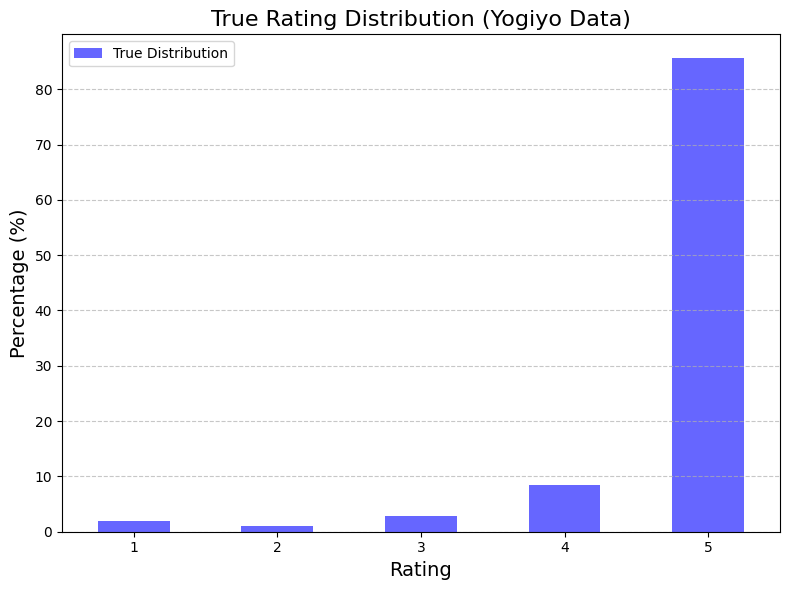

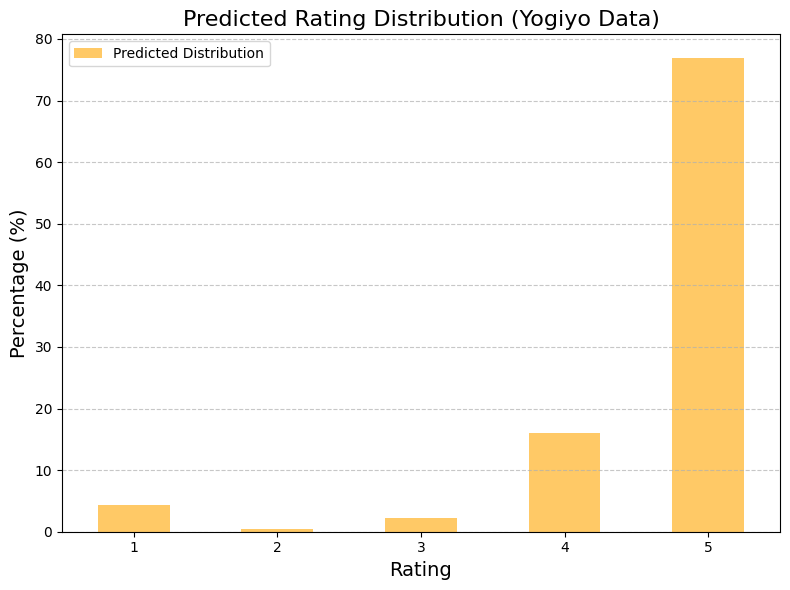

True Distribution (%):
rating
1     1.896932
2     1.048235
3     2.894618
4     8.516242
5    85.643973
Name: proportion, dtype: float64

Predicted Distribution (%):
1     4.280735
2     0.396414
3     2.303988
4    16.109293
5    76.909570
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Í∑∏ÎûòÌîÑ 1: Ïã§Ï†ú Í∞í Î∂ÑÌè¨
fig, ax1 = plt.subplots(figsize=(8, 6))
true_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='blue', label='True Distribution', ax=ax1)
ax1.set_title("True Rating Distribution (Yogiyo Data)", fontsize=16)
ax1.set_xlabel("Rating", fontsize=14)
ax1.set_ylabel("Percentage (%)", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Í∑∏ÎûòÌîÑ 2: ÏòàÏ∏° Í∞í Î∂ÑÌè¨
fig, ax2 = plt.subplots(figsize=(8, 6))
pred_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='orange', label='Predicted Distribution', ax=ax2)
ax2.set_title("Predicted Rating Distribution (Yogiyo Data)", fontsize=16)
ax2.set_xlabel("Rating", fontsize=14)
ax2.set_ylabel("Percentage (%)", fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Î∂ÑÌè¨ Ï∂úÎ†•
print("True Distribution (%):")
print(true_distribution_yogiyo.sort_index())

print("\nPredicted Distribution (%):")
print(pred_distribution_yogiyo.sort_index())


## TF-IDF -> lightgbm

In [ ]:
import lightgbm as lgb

combined_df = pd.read_csv("/content/drive/MyDrive/preprocess+translate+eda+swap.csv")
x = combined_df['comment']
y = combined_df['rating']

tfidf_vectorizer_lgb = TfidfVectorizer()
x = tfidf_vectorizer_lgb.fit_transform(x)
X_train_resampled, X_test, y_train_resampled,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

lgb = lgb.LGBMClassifier(random_state = 42)
lgb.fit(X_train_resampled, y_train_resampled)
y_pred = lgb.predict(X_test)
# ÌõàÎ†® ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
train_pred = rf.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_pred)
print("ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:")
print(f"Train Accuracy (Ï†ïÌôïÎèÑ): {train_accuracy:.4f}")
print("\nTrain Classification Report:")
print(classification_report(y_train_resampled, train_pred))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("\nÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:")
print(f"Test Accuracy (Ï†ïÌôïÎèÑ): {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 11.989022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183083
[LightGBM] [Info] Number of data points in the train set: 95422, number of used features: 5641
[LightGBM] [Info] Start training from score -1.468404
[LightGBM] [Info] Start training from score -2.093350
[LightGBM] [Info] Start training from score -1.739016
[LightGBM] [Info] Start training from score -1.298560
[LightGBM] [Info] Start training from score -1.620418
ÌõàÎ†® ÏÑ∏Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú:
Train Accuracy (Ï†ïÌôïÎèÑ): 0.9877

Train Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     21975
           2       0.99      0.98      0.99     11763
           3       0.99      0.98      0.99     16765
           4       0.99      0.99      0.99     26043
           5       0.97      0.99      0.98     18876

    accur

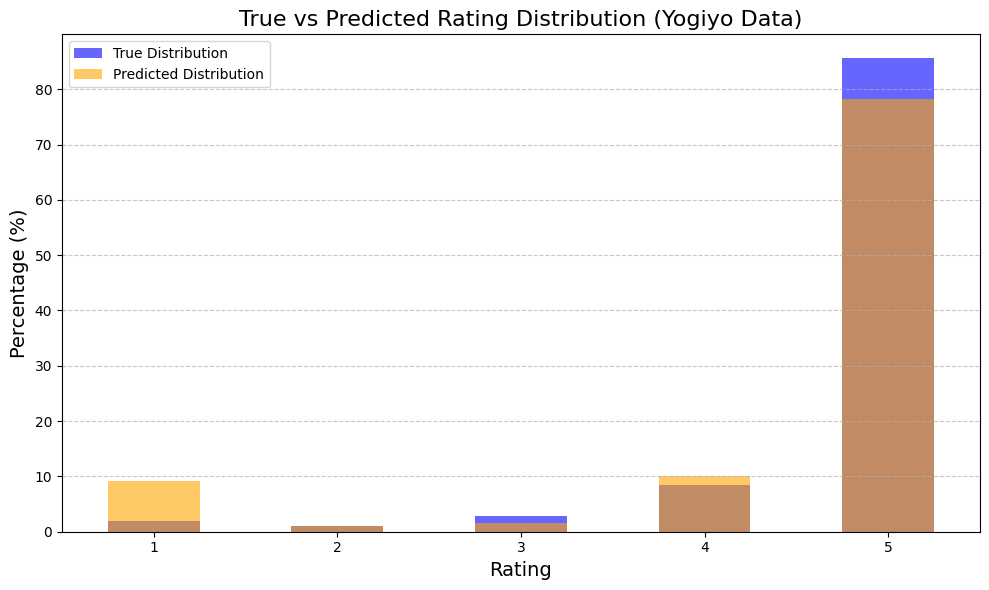

True Distribution (%):
rating
1     1.896932
2     1.048235
3     2.894618
4     8.516242
5    85.643973
Name: proportion, dtype: float64

Predicted Distribution (%):
1     9.229255
2     0.965759
3     1.489877
4    10.099236
5    78.215873
Name: proportion, dtype: float64


In [ ]:
yogiyo_data = pd.read_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")
yogiyo_data.dropna(inplace = True)
yogiyo_data.to_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")
x = yogiyo_data['comment']
y = yogiyo_data['rating']

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x = tfidf_vectorizer_lgb.transform(x)
y_yogiyo_pred = lgb.predict(x)

# Ï†ïÎãµÍ∞í Î∂ÑÌè¨ Í≥ÑÏÇ∞
true_distribution_yogiyo = y.value_counts(normalize=True) * 100

# ÏòàÏ∏°Í∞í Î∂ÑÌè¨ Í≥ÑÏÇ∞
pred_distribution_yogiyo = pd.Series(y_yogiyo_pred).value_counts(normalize=True) * 100

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax = plt.subplots(figsize=(10, 6))

# Ïã§Ï†ú Í∞í Î∂ÑÌè¨
true_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='blue', label='True Distribution', ax=ax)

# ÏòàÏ∏° Í∞í Î∂ÑÌè¨
pred_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='orange', label='Predicted Distribution', ax=ax)

plt.title("True vs Predicted Rating Distribution (Yogiyo Data)", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Î∂ÑÌè¨ Ï∂úÎ†•
print("True Distribution (%):")
print(true_distribution_yogiyo.sort_index())

print("\nPredicted Distribution (%):")
print(pred_distribution_yogiyo.sort_index())


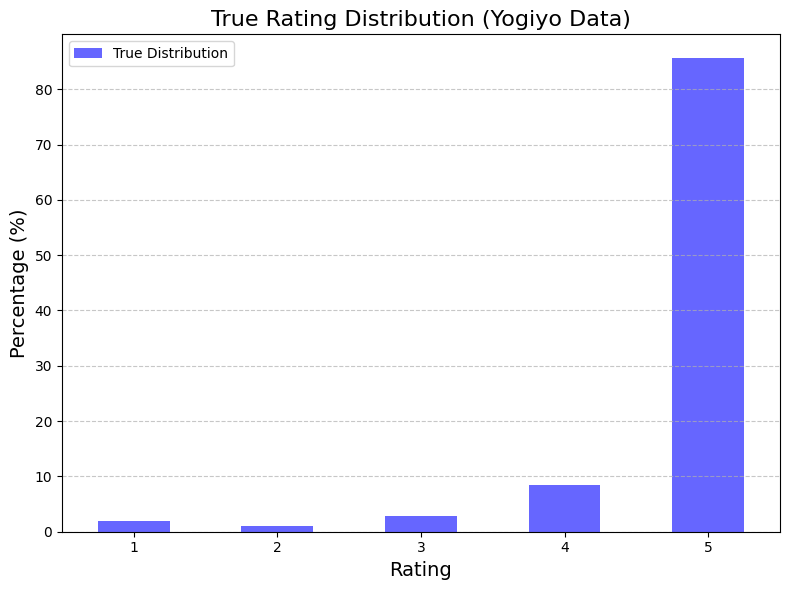

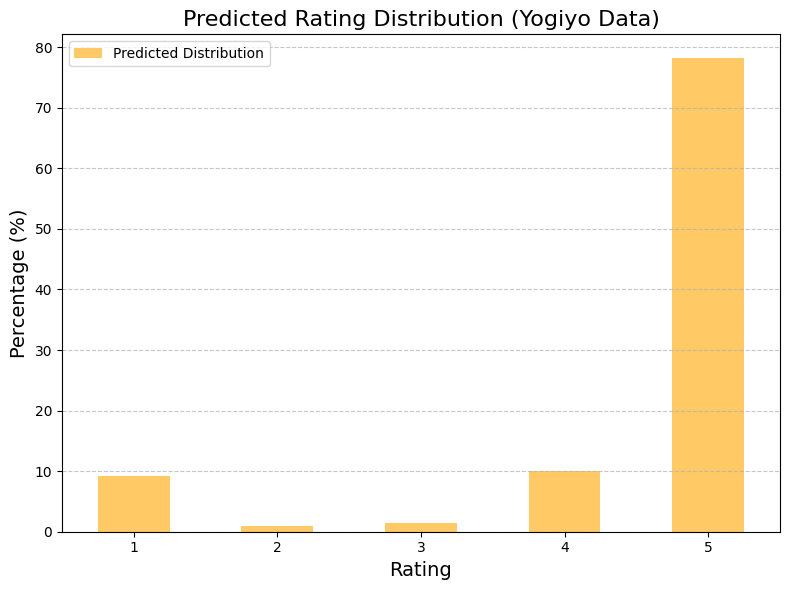

Accuracy Score: 0.7577
True Distribution (%):
rating
1     1.896932
2     1.048235
3     2.894618
4     8.516242
5    85.643973
Name: proportion, dtype: float64

Predicted Distribution (%):
1     9.229255
2     0.965759
3     1.489877
4    10.099236
5    78.215873
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Í∑∏ÎûòÌîÑ 1: Ïã§Ï†ú Í∞í Î∂ÑÌè¨
fig, ax1 = plt.subplots(figsize=(8, 6))
true_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='blue', label='True Distribution', ax=ax1)
ax1.set_title("True Rating Distribution (Yogiyo Data)", fontsize=16)
ax1.set_xlabel("Rating", fontsize=14)
ax1.set_ylabel("Percentage (%)", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Í∑∏ÎûòÌîÑ 2: ÏòàÏ∏° Í∞í Î∂ÑÌè¨
fig, ax2 = plt.subplots(figsize=(8, 6))
pred_distribution_yogiyo.sort_index().plot(kind='bar', alpha=0.6, color='orange', label='Predicted Distribution', ax=ax2)
ax2.set_title("Predicted Rating Distribution (Yogiyo Data)", fontsize=16)
ax2.set_xlabel("Rating", fontsize=14)
ax2.set_ylabel("Percentage (%)", fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Accuracy Score Í≥ÑÏÇ∞
accuracy = accuracy_score(y, y_yogiyo_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Î∂ÑÌè¨ Ï∂úÎ†•
print("True Distribution (%):")
print(true_distribution_yogiyo.sort_index())

print("\nPredicted Distribution (%):")
print(pred_distribution_yogiyo.sort_index())


## Naive Bayes(NB)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
google_data = pd.read_csv("/content/drive/MyDrive/preprocess+translate+eda+swap.csv")
yogiyo_data = pd.read_csv("/content/drive/MyDrive/preprocessed_yogiyo_review.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x = google_data['comment']
y = google_data['rating']

tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Íµ¨Í∏Ä Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµÏãúÌÇ® Í≤ΩÏö∞

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_train_pred = nb_model.predict(X_train)
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: {train_accuracy * 100:.2f}%")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_test_pred = nb_model.predict(X_test)
print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Accuracy: {test_accuracy * 100:.2f}%")

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83     21975
           2       0.98      0.44      0.61     11763
           3       0.89      0.45      0.60     16765
           4       0.69      0.69      0.69     26043
           5       0.56      0.95      0.71     18876

    accuracy                           0.71     95422
   macro avg       0.78      0.68      0.69     95422
weighted avg       0.76      0.71      0.70     95422

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: 70.94%

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.76      0.83      0.79      5601
           2       0.95      0.37      0.53      2963
           3       0.80      0.34      0.48      4149
           4       0.63      0.65      0.64      6423
           5       0.54      0.94      0.69      4720

    accuracy                           0.66     23856
   macro avg   

In [ ]:
# NaN Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ ÏÇ≠Ï†ú
yogiyo_data = yogiyo_data.dropna(subset=['comment'])

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ (Íµ¨Í∏Ä Îç∞Ïù¥ÌÑ∞)
x_train = google_data['comment']
y_train = google_data['rating']

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (ÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞)
x_test = yogiyo_data['comment']
y_test = yogiyo_data['rating']

# TfidfVectorizer ÌïôÏäµ
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(x_train)  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú fit_transform

# ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏ ÌïôÏäµ
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
y_train_pred = nb_model.predict(X_train_vec)
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: {train_accuracy * 100:.2f}%")

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.82      0.86      0.84     27576
           2       0.97      0.49      0.65     14726
           3       0.89      0.48      0.62     20914
           4       0.71      0.69      0.70     32466
           5       0.56      0.96      0.71     23596

    accuracy                           0.72    119278
   macro avg       0.79      0.69      0.70    119278
weighted avg       0.77      0.72      0.71    119278

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: 71.72%


In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎäî ÌïôÏäµÌïú tfidf_vectorizerÎ°ú Î≥ÄÌôò
X_test_vec = tfidf_vectorizer.transform(x_test)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
y_test_pred = nb_model.predict(X_test_vec)
print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Accuracy: {test_accuracy * 100:.2f}%")


ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.31      0.42      0.35       713
           2       0.11      0.01      0.01       394
           3       0.26      0.03      0.05      1088
           4       0.20      0.12      0.15      3201
           5       0.88      0.95      0.91     32191

    accuracy                           0.83     37587
   macro avg       0.35      0.30      0.30     37587
weighted avg       0.79      0.83      0.80     37587

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Accuracy: 83.03%


## SVM (Support Vector Machine)

In [ ]:
import pandas as pd
import numpy as np
import ast
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Íµ¨Í∏Ä Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµÏãúÌÇ® Í≤ΩÏö∞

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
svm_model = SVC()
svm_model.fit(X_train, y_train)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_train_pred = svm_model.predict(X_train)
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: {train_accuracy * 100:.2f}%")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_test_pred = svm_model.predict(X_test)
print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_test, y_test_pred))
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Accuracy: {test_accuracy * 100:.2f}%")

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     21975
           2       0.98      0.96      0.97     11763
           3       0.97      0.93      0.95     16765
           4       0.96      0.95      0.95     26043
           5       0.91      0.98      0.94     18876

    accuracy                           0.96     95422
   macro avg       0.96      0.96      0.96     95422
weighted avg       0.96      0.96      0.96     95422

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: 96.13%

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95      5601
           2       0.95      0.90      0.93      2963
           3       0.90      0.77      0.83      4149
           4       0.84      0.86      0.85      6423
           5       0.83      0.91      0.87      4720

    accuracy                           0.88     23856
   macro avg   

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ (Íµ¨Í∏Ä Îç∞Ïù¥ÌÑ∞)
x_train = google_data['comment']
y_train = google_data['rating']


# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê TF-IDF Î≥ÄÌôò Ï†ÅÏö©
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(x_train)

# SVM Î™®Îç∏
svm_model = SVC(C=1.0)

# Íµ¨Í∏Ä Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ
svm_model.fit(X_train_vec, y_train)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
y_train_pred = svm_model.predict(X_train_vec)
print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_train, y_train_pred))
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: {train_accuracy * 100:.2f}%")

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     27576
           2       0.98      0.97      0.98     14726
           3       0.98      0.95      0.96     20914
           4       0.97      0.96      0.96     32466
           5       0.93      0.98      0.95     23596

    accuracy                           0.97    119278
   macro avg       0.97      0.97      0.97    119278
weighted avg       0.97      0.97      0.97    119278

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Accuracy: 96.87%


In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (ÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞)
x_test = yogiyo_data['comment']
y_test = yogiyo_data['rating']

# NaN Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ ÏÇ≠Ï†ú
yogiyo_data = yogiyo_data.dropna(subset=['comment'])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê TF-IDF Î≥ÄÌôò Ï†ÅÏö©
X_test_vec = tfidf_vectorizer.transform(x_test)

# Î™®Îç∏ ÏòàÏ∏° (ÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°)
y_pred_yogiyo = svm_model.predict(X_test_vec)

# ÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
print("\nÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:")
print(classification_report(y_test, y_pred_yogiyo))

# ÏòàÏ∏°Îêú ÌèâÏ†ê ÌôïÏù∏
yogiyo_data['predicted_rating'] = y_pred_yogiyo
print("ÏòàÏ∏°Îêú ÌèâÏ†ê (ÏöîÍ∏∞Ïöî):")
print(yogiyo_data[['comment', 'predicted_rating']].head())

# Ï†ïÌôïÎèÑ(Accuracy) ÌèâÍ∞Ä
accuracy = accuracy_score(y_test, y_pred_yogiyo)
print(f'Accuracy: {accuracy * 100:.2f}%')


ÏöîÍ∏∞Ïöî Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä:
              precision    recall  f1-score   support

           1       0.27      0.75      0.40       713
           2       0.07      0.07      0.07       394
           3       0.16      0.21      0.18      1088
           4       0.16      0.25      0.20      3201
           5       0.92      0.83      0.87     32191

    accuracy                           0.75     37587
   macro avg       0.32      0.42      0.34     37587
weighted avg       0.82      0.75      0.78     37587

ÏòàÏ∏°Îêú ÌèâÏ†ê (ÏöîÍ∏∞Ïöî):
                                   comment  predicted_rating
0  ÎøåÎßÅÌÅ¥ Ïñ∏Ï†úÎÇò ÎßõÏûàÎã§ Ìï¥ Ïöî ÏÜåÏä§ Ïò§ÎûòÎêòÎã§ Í±¥ÏßÄÎã§ Ï†§Î¶¨ Ï≤òÎüº Íµ≥Îã§ Ïò§Îã§                 5
1                Ïò§Îäò ÏñëÎÖê ÏùÑ Îçî ÎÑâÎÑâÌïòÎã§ ÏûÖÌûàÎã§ ÎßõÏûàÎã§ Î®πÎã§                 4
2                    ÎÑòÎã§ ÎπÑÏÇ≠ ÎπÑÏÇ≠ Í≤å Îßõ ÎÇòÎã§ ÏûêÎã§ Î®πÎã§                 5
3                           ÏûêÎã§ Î∞õÎã§ Ïû¨Îã§ ÏòàÏ†ï Ïù¥Îã§            

## CNN

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/preprocess+translate+eda+swap.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

# ÌäπÏÑ±Í≥º Î†àÏù¥Î∏î Î∂ÑÎ¶¨
texts = data['comment']
labels = data['rating']

# ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

# ÌÜ†ÌÅ∞Ìôî Î∞è ÏãúÌÄÄÏä§ Î≥ÄÌôò
tokenizer = Tokenizer(num_words=20000)  # ÏÉÅÏúÑ 20,000Í∞úÏùò Îã®Ïñ¥Îßå ÏÇ¨Ïö©
tokenizer.fit_on_texts(texts_train)
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

# Ìå®Îî©
max_sequence_length = 100  # Í≥†Ï†ïÎêú Í∏∏Ïù¥Î°ú ÏãúÌÄÄÏä§Î•º Ìå®Îî©
x_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
x_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Î†àÏù¥Î∏î Ïõê-Ìï´ Ïù∏ÏΩîÎî©
from tensorflow.keras.utils import to_categorical

num_classes = labels.nunique()
y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)


In [ ]:
y_train = y_train[:, 1:]
y_test = y_test[:, 1:]

In [ ]:
# Input layer
input_layer = Input(shape=(100,))

# Embedding layer
embedding_layer = Embedding(input_dim=20000, output_dim=50, input_length=100)(input_layer)

# Conv1D + GlobalMaxPooling layers
conv_layers = [Conv1D(128, kernel_size=5, activation='relu', padding='same')(embedding_layer)]
pooled_layers = [GlobalMaxPooling1D()(conv) for conv in conv_layers]

# Concatenate pooled outputs
concat_layer = Concatenate()(pooled_layers)

# Dropout and Dense layers
dropout_layer = Dropout(0.5)(concat_layer)
dense_layer = Dense(64, activation='relu')(dropout_layer)
output_layer = Dense(5, activation='softmax')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)             ‚îÇ (None, 100)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding (Embedding)                ‚îÇ (None, 100, 50)             ‚îÇ       1,000,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                      ‚îÇ (None, 100, 128)            ‚îÇ          32,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d                 ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îÇ (GlobalMaxPooling1D)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate (Concatenate)            ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 128)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 64)                  ‚îÇ           8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 5)                   ‚îÇ             325 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,040,709 (3.97 MB)

 Trainable params: 1,040,709 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 92s 37ms/step - accuracy: 0.4801 - loss: 1.2113 - val_accuracy: 0.6473 - val_loss: 0.8615
Epoch 2/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 93s 39ms/step - accuracy: 0.6957 - loss: 0.7566 - val_accuracy: 0.7107 - val_loss: 0.7328
Epoch 3/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 136s 37ms/step - accuracy: 0.7704 - loss: 0.5774 - val_accuracy: 0.7321 - val_loss: 0.6898
Epoch 4/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139s 35ms/step - accuracy: 0.8114 - loss: 0.4721 - val_accuracy: 0.7415 - val_loss: 0.6862
Epoch 5/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 130s 30ms/step - accuracy: 0.8355 - loss: 0.4080 - val_accuracy: 0.7540 - val_loss: 0.7003
Epoch 6/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72s 30ms/step - accuracy: 0.8512 - loss: 0.3655 - val_a

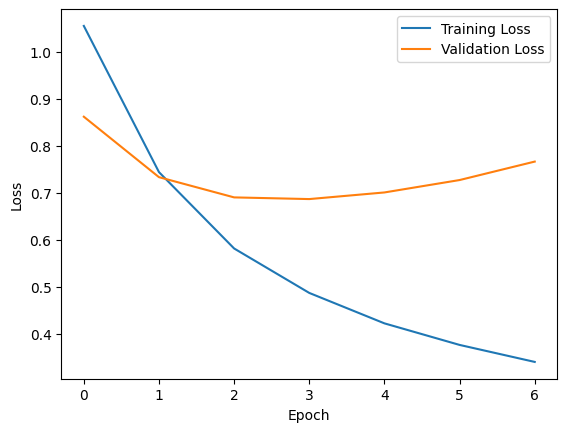

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/preprocess+translate+eda+swap.csv")

Mounted at /content/drive


In [ ]:
data = data.drop(columns=['Unnamed: 0'])

texts = data['comment']
labels = data['rating']

texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
labels_train = labels_train - 1
labels_test = labels_test - 1

In [ ]:
# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(texts_train)
sequences_train = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

# Ìå®Îî©
max_sequence_length = 100
x_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
x_test = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Î†àÏù¥Î∏î Ï†ÑÏ≤òÎ¶¨
num_classes = len(set(labels))
y_train = to_categorical(labels_train, num_classes=num_classes)
y_test = to_categorical(labels_test, num_classes=num_classes)

# LSTM Î™®Îç∏ ÏÑ§Í≥Ñ
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_sequence_length),
    LSTM(128, dropout=0.5, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2,
          callbacks=[checkpoint_cb, early_stopping_cb])

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 556s 232ms/step - accuracy: 0.4965 - loss: 1.1788 - val_accuracy: 0.6366 - val_loss: 0.8979
Epoch 2/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 566s 234ms/step - accuracy: 0.6991 - loss: 0.7573 - val_accuracy: 0.7001 - val_loss: 0.7471
Epoch 3/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 559s 232ms/step - accuracy: 0.7619 - loss: 0.5998 - val_accuracy: 0.7315 - val_loss: 0.6868
Epoch 4/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 561s 235ms/step - accuracy: 0.7931 - loss: 0.5193 - val_accuracy: 0.7445 - val_loss: 0.6562
Epoch 5/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 561s 235ms/step - accuracy: 0.8145 - loss: 0.4609 - val_accuracy: 0.7569 - val_loss: 0.6573
Epoch 6/20
2386/2386 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 563s 236ms/step - accuracy: 0.8342 - loss: 0.408

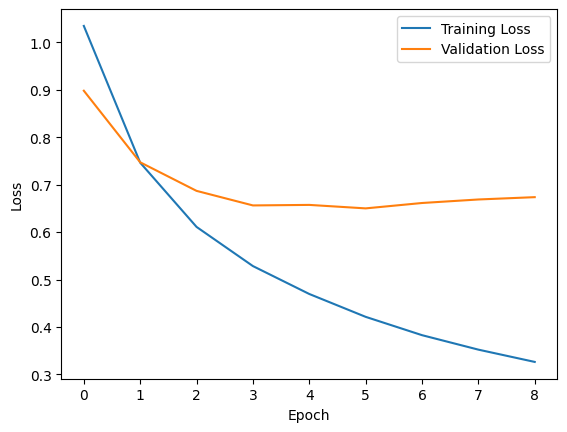

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# TF-IDF ÌÇ§ÏõåÎìú Ï∂îÏ∂ú

In [8]:
!pip install konlpy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 79.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 493.8/493.8 kB 27.7 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df1 = pd.read_csv("/content/drive/MyDrive/incorrect_predictions_yogiyo.csv")
df2 = pd.read_csv("/content/drive/MyDrive/correct_predictions_yogiyo.csv")

In [16]:
import ast  # Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Îç∞ ÏÇ¨Ïö©

# Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ•º Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò ÌõÑ Ï≤òÎ¶¨
def process_string_list(row):
    # Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    row = ast.literal_eval(row) if isinstance(row, str) else row
    # Î¶¨Ïä§Ìä∏ ÏöîÏÜå Ï†ïÎ¶¨ (ÏñëÏ™Ω ÏûëÏùÄÎî∞Ïò¥ÌëúÏôÄ Í≥µÎ∞± Ï†úÍ±∞)
    # cleaned = [elem.strip(" '") for elem in row]
    return ''.join(row)  # ÏöîÏÜåÎ•º Í∑∏ÎåÄÎ°ú Ïó∞Í≤∞

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ï≤òÎ¶¨
df1['Comment'] = df1['Comment'].apply(process_string_list)
df2['Comment'] = df2['Comment'].apply(process_string_list)

<Axes: xlabel='Predicted', ylabel='Actual'>

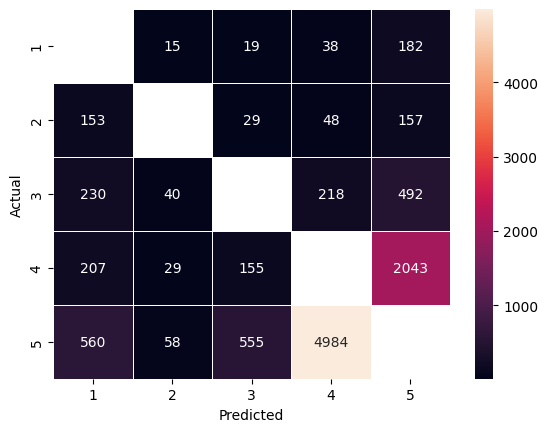

In [ ]:
count = df1.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

pivot_df = count.pivot(index='Actual', columns='Predicted', values='Count')

sns.heatmap(pivot_df, annot=True, fmt='g', linewidths=0.5)

In [17]:
incorrect_data1 = df1[(df1['Actual'] == 5) & (df1['Predicted'] == 4)]
incorrect_data2 = df1[(df1['Actual'] == 5) & (df1['Predicted'] == 3)]
incorrect_data3 = df1[(df1['Actual'] == 5) & (df1['Predicted'] == 2)]
incorrect_data4 = df1[(df1['Actual'] == 5) & (df1['Predicted'] == 1)]
incorrect_data = pd.concat([incorrect_data1, incorrect_data2, incorrect_data3, incorrect_data4])

In [18]:
correct_data = df2[(df2['Actual'] == 5) & (df2['Predicted'] == 5)]

In [70]:
import re
from collections import Counter
from konlpy.tag import Okt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
okt = Okt()

stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ïöî', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà',
                  'Îêò', 'Ïàò', 'Î≥¥', 'Ï£º', 'Îì±', 'Ìïú', 'Ïóê', 'ÎèÑ', 'ÎøåÎßÅÌÅ¥', 'ÏßÄÏ†ê',
                  'ÏπòÌÇ®', 'bhc', 'Î°ØÎç∞Î¶¨ÏïÑ', 'Î∞∞Îã¨', 'Ïñë', 'ÍµêÏ¥å'])

# Ï†ÑÏ≤òÎ¶¨ Î∞è Îã®Ïñ¥ Ï∂îÏ∂ú Ìï®Ïàò
def extract_tokens(text):
    # ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±Îßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄ Ï†úÍ±∞
    cleaned_text = re.sub(r"[^Í∞Ä-Ìû£\s]", "", text)
    # Îã®Ïñ¥ Ï∂îÏ∂ú
    tokens = okt.morphs(cleaned_text, stem=True)
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [57]:
# incorrect data

# Î™®Îì† Î¶¨Î∑∞ÏóêÏÑú Îã®Ïñ¥ Ï∂îÏ∂ú Î∞è Î≥ëÌï©
all_tokens = []
for comment in incorrect_data['Comment']:
    tokens = extract_tokens(comment)
    all_tokens.extend(tokens)

# Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
token_counter = Counter(all_tokens)

# ÏÉÅÏúÑ ÎπàÎèÑ Îã®Ïñ¥ Ï∂úÎ†•
top_words = token_counter.most_common(30)
print("Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")
for word, freq in top_words:
    print(f"Îã®Ïñ¥: {word}, ÎπàÎèÑ: {freq}")

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):
Îã®Ïñ¥: ÎßõÏûàÎã§, ÎπàÎèÑ: 3190
Îã®Ïñ¥: Î®πÎã§, ÎπàÎèÑ: 1479
Îã®Ïñ¥: Îßõ, ÎπàÎèÑ: 1085
Îã®Ïñ¥: 
, ÎπàÎèÑ: 972
Îã®Ïñ¥: Ï¢ãÎã§, ÎπàÎèÑ: 797
Îã®Ïñ¥: ÏãúÌÇ§Îã§, ÎπàÎèÑ: 653
Îã®Ïñ¥: Îπ†Î•¥Îã§, ÎπàÎèÑ: 632
Îã®Ïñ¥: ÌïòÎã§, ÎπàÎèÑ: 611
Îã®Ïñ¥: Ïöî, ÎπàÎèÑ: 524
Îã®Ïñ¥: ÎÑàÎ¨¥, ÎπàÎèÑ: 461
Îã®Ïñ¥: ÎßéÎã§, ÎπàÎèÑ: 405
Îã®Ïñ¥: ÏûàÎã§, ÎπàÎèÑ: 333
Îã®Ïñ¥: Ïó≠Ïãú, ÎπàÎèÑ: 307
Îã®Ïñ¥: ÏûêÎã§, ÎπàÎèÑ: 283
Îã®Ïñ¥: Ïûò, ÎπàÎèÑ: 279
Îã®Ïñ¥: Ï¢Ä, ÎπàÎèÑ: 273
Îã®Ïñ¥: Î≥¥Îã§, ÎπàÎèÑ: 256
Îã®Ïñ¥: Îã§, ÎπàÎèÑ: 254
Îã®Ïñ¥: Îòê, ÎπàÎèÑ: 253
Îã®Ïñ¥: Ï°∞Í∏à, ÎπàÎèÑ: 250
Îã®Ïñ¥: ÏñëÎèÑ, ÎπàÎèÑ: 220
Îã®Ïñ¥: ÏóÜÎã§, ÎπàÎèÑ: 210
Îã®Ïñ¥: Í∞ôÎã§, ÎπàÎèÑ: 210
Îã®Ïñ¥: ÎÇò, ÎπàÎèÑ: 204
Îã®Ïñ¥: Îçî, ÎπàÎèÑ: 200
Îã®Ïñ¥: ÏßúÎã§, ÎπàÎèÑ: 194
Îã®Ïñ¥: Îßå, ÎπàÎèÑ: 190
Îã®Ïñ¥: Ï£ºÎ¨∏, ÎπàÎèÑ: 188
Îã®Ïñ¥: ÏßÄ, ÎπàÎèÑ: 174
Îã®Ïñ¥: ÏïÑÏâΩÎã§, ÎπàÎèÑ: 171


In [65]:
# incorrect_data2

all_tokens = []
for comment in incorrect_data2['Comment']:
    tokens = extract_tokens(comment)
    all_tokens.extend(tokens)

token_counter = Counter(all_tokens)

top_words = token_counter.most_common(30)
print("Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")
for word, freq in top_words:
    print(f"Îã®Ïñ¥: {word}, ÎπàÎèÑ: {freq}")

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):
Îã®Ïñ¥: Îßõ, ÎπàÎèÑ: 123
Îã®Ïñ¥: ÎßõÏûàÎã§, ÎπàÎèÑ: 120
Îã®Ïñ¥: Î®πÎã§, ÎπàÎèÑ: 98
Îã®Ïñ¥: Îπ®Î•¥Îã§, ÎπàÎèÑ: 85
Îã®Ïñ¥: Ïöî, ÎπàÎèÑ: 80
Îã®Ïñ¥: ÏãúÌÇ§Îã§, ÎπàÎèÑ: 54
Îã®Ïñ¥: 
, ÎπàÎèÑ: 51
Îã®Ïñ¥: ÎÑàÎ¨¥, ÎπàÎèÑ: 38
Îã®Ïñ¥: Í∑∏ÎÉ•, ÎπàÎèÑ: 35
Îã®Ïñ¥: Ï¢ãÎã§, ÎπàÎèÑ: 35
Îã®Ïñ¥: Îòê, ÎπàÎèÑ: 32
Îã®Ïñ¥: ÌïòÎã§, ÎπàÎèÑ: 32
Îã®Ïñ¥: Ï¢Ä, ÎπàÎèÑ: 26
Îã®Ïñ¥: Í∑∏Î†áÎã§, ÎπàÎèÑ: 25
Îã®Ïñ¥: Ï°¥Îßõ, ÎπàÎèÑ: 23
Îã®Ïñ¥: ÏûêÎã§, ÎπàÎèÑ: 22
Îã®Ïñ¥: ÎÇò, ÎπàÎèÑ: 22
Îã®Ïñ¥: ÏèòÎã§, ÎπàÎèÑ: 22
Îã®Ïñ¥: Î≥¥Îã§, ÎπàÎèÑ: 21
Îã®Ïñ¥: ÎßéÏù¥, ÎπàÎèÑ: 20
Îã®Ïñ¥: ÎßéÎã§, ÎπàÎèÑ: 18
Îã®Ïñ¥: Í¥úÏ∞ÆÎã§, ÎπàÎèÑ: 18
Îã®Ïñ¥: Í∞ôÎã§, ÎπàÎèÑ: 18
Îã®Ïñ¥: ÎßÅÌÅ¥, ÎπàÎèÑ: 17
Îã®Ïñ¥: Îã§, ÎπàÎèÑ: 17
Îã®Ïñ¥: Îã§Ïùå, ÎπàÎèÑ: 17
Îã®Ïñ¥: ÏïÑÏâΩÎã§, ÎπàÎèÑ: 17
Îã®Ïñ¥: Ï°∞Í∏à, ÎπàÎèÑ: 17
Îã®Ïñ¥: ÏßúÎã§, ÎπàÎèÑ: 16
Îã®Ïñ¥: Ï†ê, ÎπàÎèÑ: 15


In [66]:
# incorrect_data3

all_tokens = []
for comment in incorrect_data3['Comment']:
    tokens = extract_tokens(comment)
    all_tokens.extend(tokens)

token_counter = Counter(all_tokens)

top_words = token_counter.most_common(30)
print("Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")
for word, freq in top_words:
    print(f"Îã®Ïñ¥: {word}, ÎπàÎèÑ: {freq}")

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):
Îã®Ïñ¥: Îßõ, ÎπàÎèÑ: 15
Îã®Ïñ¥: ÎÑàÎ¨¥, ÎπàÎèÑ: 15
Îã®Ïñ¥: Ïöî, ÎπàÎèÑ: 10
Îã®Ïñ¥: ÏßúÎã§, ÎπàÎèÑ: 9
Îã®Ïñ¥: ÎÇò, ÎπàÎèÑ: 6
Îã®Ïñ¥: Î®πÎã§, ÎπàÎèÑ: 6
Îã®Ïñ¥: Í∞ì, ÎπàÎèÑ: 5
Îã®Ïñ¥: ÌïòÎã§, ÎπàÎèÑ: 5
Îã®Ïñ¥: ÎäêÎ¶¨Îã§, ÎπàÎèÑ: 5
Îã®Ïñ¥: Ïó¨, ÎπàÎèÑ: 4
Îã®Ïñ¥: ÎßåÏ°±ÌïòÎã§, ÎπàÎèÑ: 4
Îã®Ïñ¥: Í∑∏Î†áÎã§, ÎπàÎèÑ: 4
Îã®Ïñ¥: ÎπÑÎã§, ÎπàÎèÑ: 4
Îã®Ïñ¥: ÎπÑÏã∏Îã§, ÎπàÎèÑ: 3
Îã®Ïñ¥: Ï£ºÎ¨∏, ÎπàÎèÑ: 3
Îã®Ïñ¥: ÏÜåÏä§, ÎπàÎèÑ: 3
Îã®Ïñ¥: ÎàÖÎàÖÌïòÎã§, ÎπàÎèÑ: 3
Îã®Ïñ¥: Í∑∏ÎÉ•, ÎπàÎèÑ: 3
Îã®Ïñ¥: Ïïà, ÎπàÎèÑ: 3
Îã®Ïñ¥: Ï†ê, ÎπàÎèÑ: 3
Îã®Ïñ¥: Ï¢Ä, ÎπàÎèÑ: 3
Îã®Ïñ¥: ÏïäÎã§, ÎπàÎèÑ: 3
Îã®Ïñ¥: Îã§Ïùå, ÎπàÎèÑ: 2
Îã®Ïñ¥: Îòê, ÎπàÎèÑ: 2
Îã®Ïñ¥: ÏãúÍ∞Ñ, ÎπàÎèÑ: 2
Îã®Ïñ¥: ÏπòÏ¶àÎ≥º, ÎπàÎèÑ: 2
Îã®Ïñ¥: Í∞ú, ÎπàÎèÑ: 2
Îã®Ïñ¥: Îã¨Îã§, ÎπàÎèÑ: 2
Îã®Ïñ¥: ÎπÑ, ÎπàÎèÑ: 2
Îã®Ïñ¥: Ïß±Ïß±, ÎπàÎèÑ: 2


In [71]:
# incorrect_data4

all_tokens = []
for comment in incorrect_data4['Comment']:
    tokens = extract_tokens(comment)
    all_tokens.extend(tokens)

token_counter = Counter(all_tokens)

top_words = token_counter.most_common(30)
print("Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")
for word, freq in top_words:
    print(f"Îã®Ïñ¥: {word}, ÎπàÎèÑ: {freq}")

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):
Îã®Ïñ¥: ÌïòÎã§, ÎπàÎèÑ: 240
Îã®Ïñ¥: 
, ÎπàÎèÑ: 223
Îã®Ïñ¥: Îßõ, ÎπàÎèÑ: 181
Îã®Ïñ¥: ÏãúÌÇ§Îã§, ÎπàÎèÑ: 171
Îã®Ïñ¥: Î®πÎã§, ÎπàÎèÑ: 170
Îã®Ïñ¥: ÎÑàÎ¨¥, ÎπàÎèÑ: 155
Îã®Ïñ¥: Î∞õÎã§, ÎπàÎèÑ: 100
Îã®Ïñ¥: ÏóÜÎã§, ÎπàÎèÑ: 99
Îã®Ïñ¥: Ï£ºÎ¨∏, ÎπàÎèÑ: 75
Îã®Ïñ¥: Ïò§Îã§, ÎπàÎèÑ: 63
Îã®Ïñ¥: ÎÇò, ÎπàÎèÑ: 57
Îã®Ïñ¥: Î≥¥Îã§, ÎπàÎèÑ: 57
Îã®Ïñ¥: Ïïà, ÎπàÎèÑ: 56
Îã®Ïñ¥: ÏãúÍ∞Ñ, ÎπàÎèÑ: 56
Îã®Ïñ¥: Ïò§Îäò, ÎπàÎèÑ: 54
Îã®Ïñ¥: Îã§, ÎπàÎèÑ: 51
Îã®Ïñ¥: Î¶¨Î∑∞, ÎπàÎèÑ: 49
Îã®Ïñ¥: Î°ú, ÎπàÎèÑ: 49
Îã®Ïñ¥: Îßå, ÎπàÎèÑ: 47
Îã®Ïñ¥: ÏûàÎã§, ÎπàÎèÑ: 47
Îã®Ïñ¥: Ï¢Ä, ÎπàÎèÑ: 45
Îã®Ïñ¥: Îã§Ïùå, ÎπàÎèÑ: 43
Îã®Ïñ¥: Í∞ôÎã§, ÎπàÎèÑ: 42
Îã®Ïñ¥: Î∂Ñ, ÎπàÎèÑ: 39
Îã®Ïñ¥: ÎßéÏù¥, ÎπàÎèÑ: 38
Îã®Ïñ¥: ÏùÑ, ÎπàÎèÑ: 37
Îã®Ïñ¥: ÏßúÎã§, ÎπàÎèÑ: 36
Îã®Ïñ¥: Ïù¥Îã§, ÎπàÎèÑ: 35
Îã®Ïñ¥: ÏïÑÎãàÎã§, ÎπàÎèÑ: 34
Îã®Ïñ¥: ÏûêÎã§, ÎπàÎèÑ: 34


In [69]:
# correct_data

all_tokens = []
for comment in correct_data['Comment']:
    tokens = extract_tokens(comment)
    all_tokens.extend(tokens)

token_counter = Counter(all_tokens)

top_words = token_counter.most_common(30)
print("Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):")
for word, freq in top_words:
    print(f"Îã®Ïñ¥: {word}, ÎπàÎèÑ: {freq}")

Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏùò Îã®Ïñ¥ (Î∂àÏö©Ïñ¥ Ï†úÏô∏):
Îã®Ïñ¥: ÎßõÏûàÎã§, ÎπàÎèÑ: 18854
Îã®Ïñ¥: Î®πÎã§, ÎπàÎèÑ: 15861
Îã®Ïñ¥: 
, ÎπàÎèÑ: 6871
Îã®Ïñ¥: ÌïòÎã§, ÎπàÎèÑ: 5999
Îã®Ïñ¥: Îßõ, ÎπàÎèÑ: 5077
Îã®Ïñ¥: ÏûêÎã§, ÎπàÎèÑ: 4873
Îã®Ïñ¥: ÎÑàÎ¨¥, ÎπàÎèÑ: 4395
Îã®Ïñ¥: ÏãúÌÇ§Îã§, ÎπàÎèÑ: 3759
Îã®Ïñ¥: Ï¢ãÎã§, ÎπàÎèÑ: 3649
Îã®Ïñ¥: Ïûò, ÎπàÎèÑ: 3154
Îã®Ïñ¥: Î≥¥Îã§, ÎπàÎèÑ: 2532
Îã®Ïñ¥: Îπ†Î•¥Îã§, ÎπàÎèÑ: 2170
Îã®Ïñ¥: Ìï≠ÏÉÅ, ÎπàÎèÑ: 1970
Îã®Ïñ¥: Í∞êÏÇ¨ÌïòÎã§, ÎπàÎèÑ: 1929
Îã®Ïñ¥: Ïöî, ÎπàÎèÑ: 1903
Îã®Ïñ¥: Ïù¥Îã§, ÎπàÎèÑ: 1881
Îã®Ïñ¥: Ïò§Îã§, ÎπàÎèÑ: 1873
Îã®Ïñ¥: Ï£ºÎ¨∏, ÎπàÎèÑ: 1785
Îã®Ïñ¥: ÏûàÎã§, ÎπàÎèÑ: 1666
Îã®Ïñ¥: ÎßéÎã§, ÎπàÎèÑ: 1464
Îã®Ïñ¥: ÏµúÍ≥†, ÎπàÎèÑ: 1435
Îã®Ïñ¥: Ïó≠Ïãú, ÎπàÎèÑ: 1433
Îã®Ïñ¥: Îòê, ÎπàÎèÑ: 1380
Îã®Ïñ¥: ÎÑòÎã§, ÎπàÎèÑ: 1358
Îã®Ïñ¥: ÏßÑÏßú, ÎπàÎèÑ: 1330
Îã®Ïñ¥: Îßå, ÎπàÎèÑ: 1309
Îã®Ïñ¥: Í∞ôÎã§, ÎπàÎèÑ: 1200
Îã®Ïñ¥: Î∞îÏÇ≠, ÎπàÎèÑ: 1142
Îã®Ïñ¥: Îã§, ÎπàÎèÑ: 1131
Îã®Ïñ¥: ÏñëÎèÑ, ÎπàÎèÑ: 1093


correct: 5,
incorrect: 5 -> 4

In [19]:
all_data = pd.concat([incorrect_data1, correct_data])

In [20]:
okt = Okt()

stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà',
                  'Îêò', 'Ïàò', 'Î≥¥', 'Ï£º', 'Îì±', 'Ìïú', 'Ïóê', 'ÎøåÎßÅÌÅ¥', 'ÏßÄÏ†ê', 'bhc', 'Î°ØÎç∞Î¶¨ÏïÑ', 'Î∞∞Îã¨', 'Ïñë'])

def tokenize_korean(text):
    token_li = okt.morphs(text, stem=True)
    clean = [token for token in token_li if not token in stop_words]
    return clean

vectorizer = TfidfVectorizer(tokenizer=tokenize_korean)
tfidf_matrix = vectorizer.fit_transform(all_data['Comment'])

# TF-IDF Îã®Ïñ¥ÏôÄ Ï†êÏàò ÌôïÏù∏
tfidf_feature_names = vectorizer.get_feature_names_out()  # Îã®Ïñ¥ Î™©Î°ù
tfidf_scores = tfidf_matrix.toarray()  # TF-IDF Ï†êÏàò Î∞∞Ïó¥

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# incorrect_dataÏôÄ correct_dataÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ Î≤àÌò∏
incorrect_indices = range(len(incorrect_data1))
correct_indices = range(len(incorrect_data1), len(all_data))

# TF-IDF ÌèâÍ∑† Í≥ÑÏÇ∞
incorrect_tfidf_mean = np.mean(tfidf_scores[incorrect_indices], axis=0)
correct_tfidf_mean = np.mean(tfidf_scores[correct_indices], axis=0)

# correct_data ÏßëÌï©Ïóê ÏóÜÎäî Îã®Ïñ¥ ÌïÑÌÑ∞ÎßÅ
unique_to_incorrect = []
for i, word in enumerate(tfidf_feature_names):
    if incorrect_tfidf_mean[i] > correct_tfidf_mean[i] * 2:
        unique_to_incorrect.append((word, incorrect_tfidf_mean[i]))

# Í≥†Ïú† Îã®Ïñ¥Î•º Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
unique_to_incorrect = sorted(unique_to_incorrect, key=lambda x: x[1], reverse=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:")
for word, score in unique_to_incorrect[:15]:
    print(f"{word}: {score:.4f}")

incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:
Îπ†Î•¥Îã§: 0.0672
ÎßéÎã§: 0.0260
Î∞∞ÏÜ°: 0.0128
Ï°∞Í∏à: 0.0127
Ï¢Ä: 0.0109
Í¥úÏ∞ÆÎã§: 0.0100
ÏßÑÎ¶¨: 0.0084
ÏßúÎã§: 0.0079
ÏïÑÏâΩÎã§: 0.0073
Í≥®Îìú: 0.0057
ÌÇπ: 0.0057
ÍµøÍµø: 0.0049
ÎùºÏÑú: 0.0048
Ï†ÅÎã§: 0.0047
Î†àÎìú: 0.0047


correct: 5,
incorrect: 5 -> 4,3,2,1

In [ ]:
all_data = pd.concat([incorrect_data, correct_data])

In [ ]:
okt = Okt()

stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà', 'Îêò',
                  'Ïàò', 'Î≥¥', 'Ï£º', 'Îì±', 'Ìïú', 'Ïóê', 'ÎøåÎßÅÌÅ¥', 'ÏßÄÏ†ê', 'bhc', 'Î°ØÎç∞Î¶¨ÏïÑ', 'Î∞∞Îã¨', 'Ïñë'])

def tokenize_korean(text):
    token_li = okt.morphs(text, stem=True)
    clean = [token for token in token_li if not token in stop_words]
    return clean

vectorizer = TfidfVectorizer(tokenizer=tokenize_korean)
tfidf_matrix = vectorizer.fit_transform(all_data['Comment'])

# TF-IDF Îã®Ïñ¥ÏôÄ Ï†êÏàò ÌôïÏù∏
tfidf_feature_names = vectorizer.get_feature_names_out()  # Îã®Ïñ¥ Î™©Î°ù
tfidf_scores = tfidf_matrix.toarray()  # TF-IDF Ï†êÏàò Î∞∞Ïó¥

In [ ]:
# incorrect_dataÏôÄ correct_dataÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ Î≤àÌò∏
incorrect_indices = range(len(incorrect_data))
correct_indices = range(len(incorrect_data), len(all_data))

# TF-IDF ÌèâÍ∑† Í≥ÑÏÇ∞
incorrect_tfidf_mean = np.mean(tfidf_scores[incorrect_indices], axis=0)
correct_tfidf_mean = np.mean(tfidf_scores[correct_indices], axis=0)

# correct_data ÏßëÌï©Ïóê ÏóÜÎäî Îã®Ïñ¥ ÌïÑÌÑ∞ÎßÅ
unique_to_incorrect = []
for i, word in enumerate(tfidf_feature_names):
    if incorrect_tfidf_mean[i] > correct_tfidf_mean[i] * 2:
        unique_to_incorrect.append((word, incorrect_tfidf_mean[i]))

# Í≥†Ïú† Îã®Ïñ¥Î•º Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
unique_to_incorrect = sorted(unique_to_incorrect, key=lambda x: x[1], reverse=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:")
for word, score in unique_to_incorrect[:15]:
    print(f"{word}: {score:.4f}")

incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:
Îπ†Î•¥Îã§: 0.0552
Îπ®Î•¥Îã§: 0.0152
Ï¢Ä: 0.0113
Ï°∞Í∏à: 0.0111
Î∞∞ÏÜ°: 0.0105
Í¥úÏ∞ÆÎã§: 0.0099
ÏßúÎã§: 0.0088
ÏßÑÎ¶¨: 0.0076
ÏïÑÏâΩÎã§: 0.0076
Í≥®Îìú: 0.0050
Ï†ÅÎã§: 0.0048
Í∑ºÎç∞: 0.0046
ÎùºÏÑú: 0.0041
Îπ®: 0.0039
Í∑∏Î†áÎã§: 0.0039


correct: 1,2,3,4,5, incorrect: 5 -> 1,2,3,4

In [ ]:
all_data = pd.concat([incorrect_data, df2])

In [ ]:
okt = Okt()

stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà', 'Îêò',
                  'Ïàò', 'Î≥¥', 'Ï£º', 'Îì±', 'Ìïú', 'Ïóê', 'ÎøåÎßÅÌÅ¥', 'ÏßÄÏ†ê', 'bhc', 'Î°ØÎç∞Î¶¨ÏïÑ', 'Î∞∞Îã¨', 'Ïñë'])

def tokenize_korean(text):
    token_li = okt.morphs(text, stem=True)
    clean = [token for token in token_li if not token in stop_words]
    return clean

vectorizer = TfidfVectorizer(tokenizer=tokenize_korean)
tfidf_matrix = vectorizer.fit_transform(all_data['Comment'])

# TF-IDF Îã®Ïñ¥ÏôÄ Ï†êÏàò ÌôïÏù∏
tfidf_feature_names = vectorizer.get_feature_names_out()  # Îã®Ïñ¥ Î™©Î°ù
tfidf_scores = tfidf_matrix.toarray()  # TF-IDF Ï†êÏàò Î∞∞Ïó¥

In [ ]:
# incorrect_dataÏôÄ correct_dataÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ Î≤àÌò∏
incorrect_indices = range(len(incorrect_data))
correct_indices = range(len(incorrect_data), len(all_data))

# TF-IDF ÌèâÍ∑† Í≥ÑÏÇ∞
incorrect_tfidf_mean = np.mean(tfidf_scores[incorrect_indices], axis=0)
correct_tfidf_mean = np.mean(tfidf_scores[correct_indices], axis=0)

# correct_data ÏßëÌï©Ïóê ÏóÜÎäî Îã®Ïñ¥ ÌïÑÌÑ∞ÎßÅ
unique_to_incorrect = []
for i, word in enumerate(tfidf_feature_names):
    if incorrect_tfidf_mean[i] > correct_tfidf_mean[i] * 2:
        unique_to_incorrect.append((word, incorrect_tfidf_mean[i]))

# Í≥†Ïú† Îã®Ïñ¥Î•º Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
unique_to_incorrect = sorted(unique_to_incorrect, key=lambda x: x[1], reverse=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:")
for word, score in unique_to_incorrect[:15]:
    print(f"{word}: {score:.4f}")

incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:
Îπ†Î•¥Îã§: 0.0554
Îπ®Î•¥Îã§: 0.0152
Ï°∞Í∏à: 0.0108
Î∞∞ÏÜ°: 0.0105
Í¥úÏ∞ÆÎã§: 0.0097
ÏßúÎã§: 0.0087
ÏßÑÎ¶¨: 0.0076
ÏïÑÏâΩÎã§: 0.0075
Í≥®Îìú: 0.0050
Ï†ÅÎã§: 0.0047
Í∑ºÎç∞: 0.0045
ÏñëÏùÄ: 0.0036
Îã®: 0.0032
ÏïΩÍ∞Ñ: 0.0031
Ïò§Îûò: 0.0030


correct: 5, incorrect: 5 -> 1

In [ ]:
all_data = pd.concat([incorrect_data4, correct_data])

In [ ]:
okt = Okt()

stop_words = set(['ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏïÑ', 'Ìïò', 'Îì§', 'Í≤É', 'Ïùò', 'Ïûà', 'Îêò', 'Ïàò', 'Î≥¥',
                  'Ï£º', 'Îì±', 'Ìïú', 'Ïóê', 'ÎøåÎßÅÌÅ¥', 'ÏßÄÏ†ê', 'bhc', 'ÎßÅÌÅ¥', 'Îøå', 'ÏÑùÏ¥å', 'Ï†ê', 'ÏπòÏ¶àÎ≥º',
                  'ÎßõÏ¥àÌÇπ', 'ÌõÑÎùºÏù¥Îìú'])

def tokenize_korean(text):
    token_li = okt.morphs(text, stem=True)
    clean = [token for token in token_li if not token in stop_words]
    return clean

vectorizer = TfidfVectorizer(tokenizer=tokenize_korean)
tfidf_matrix = vectorizer.fit_transform(all_data['Comment'])

# TF-IDF Îã®Ïñ¥ÏôÄ Ï†êÏàò ÌôïÏù∏
tfidf_feature_names = vectorizer.get_feature_names_out()  # Îã®Ïñ¥ Î™©Î°ù
tfidf_scores = tfidf_matrix.toarray()  # TF-IDF Ï†êÏàò Î∞∞Ïó¥

In [ ]:
# incorrect_dataÏôÄ correct_dataÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ Î≤àÌò∏
incorrect_indices = range(len(incorrect_data4))
correct_indices = range(len(incorrect_data4), len(all_data))

# TF-IDF ÌèâÍ∑† Í≥ÑÏÇ∞
incorrect_tfidf_mean = np.mean(tfidf_scores[incorrect_indices], axis=0)
correct_tfidf_mean = np.mean(tfidf_scores[correct_indices], axis=0)

# correct_data ÏßëÌï©Ïóê ÏóÜÎäî Îã®Ïñ¥ ÌïÑÌÑ∞ÎßÅ
unique_to_incorrect = []
for i, word in enumerate(tfidf_feature_names):
    if correct_tfidf_mean[i] == 0:
        unique_to_incorrect.append((word, incorrect_tfidf_mean[i]))

# Í≥†Ïú† Îã®Ïñ¥Î•º Ï†êÏàò Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
unique_to_incorrect = sorted(unique_to_incorrect, key=lambda x: x[1], reverse=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:")
for word, score in unique_to_incorrect[:30]:
    print(f"{word}: {score:.4f}")

incorrect_dataÏóêÏÑú correct_dataÏôÄ Í≤πÏπòÏßÄ ÏïäÎäî Í≥†Ïú† ÌÇ§ÏõåÎìú:
Ìï†Í∏∞Îã§: 0.0022
ÏÇø: 0.0020
ÎèôÏùºÌïòÎã§: 0.0016
üôÇüôÇüôÇüôÇüôÇ: 0.0016
ÎÑàÎ¨¥ÌïòÎã§: 0.0015
Ìë∏ÏÑùÌë∏ÏÑùÌïòÎã§: 0.0015
Îß§Îã¨Îã§: 0.0014
ÎÜÄÎûêÏîÄÎè†: 0.0013
„Öõ„Ö†: 0.0013
Îã§ÏãúÎã§: 0.0013
??!??: 0.0012
Î∞òÌñàÏñ¥: 0.0012
Í≤π: 0.0012
Ï≤¥Ï†ú: 0.0012
ÎßõÏ´åÌÇπ: 0.0012
Ïå©ÍπåÎã§: 0.0012
Ïú†ÎãπÎ∂àÎÇ¥Ï¶ù: 0.0012
ÏôúÏºÄÎßõÎÇòÎäîÍ±¥: 0.0012
Î∏ê: 0.0012
ÏÑúÏû•: 0.0012
ÎßàÏâ¨: 0.0012
Ï≤úÌô©: 0.0012
ÎßõÏ©î: 0.0011
ÎπÑÎ¶øÎÇ¥: 0.0011
Î∞≠: 0.0011
Í±∏Î¶∞Í±¥: 0.0011
‚ù§Ô∏èüíú: 0.0011
ÏïûÏ†Ñ: 0.0011
~_: 0.0011
Ïó∞Îã¨: 0.0011
